## Context
The World Happiness Report is a landmark survey of the state of global happiness. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Motivation
I used data from Kaggle [https://www.kaggle.com/unsdsn/world-happiness] to complete this analysis.
I found the data that we analysed and visualised for Week 5 Programming Task #01 quite interesting and searched for previous years of the World Happiness Report. Happiness is a somewhat subjective and nebulous quality to quantify, so I was interested in how it was measured, determined, and analysed across multiple countries. I thought it would be interesting to investigate how happiness has changed throughout previous years and if the strongly correlated variables we investigated in the programming task were consistent throughout earlier years of data. Similarly, I wanted to look at countries with large Happiness Rank changes and determine what variables were more influential in affecting these changes, and if they were the same variables which are strongly correlated with Happiness Score.

## Data Setup and Cleaning

To start we will import the required libraries for our data analysis and define a constant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUM_DATASET = 5

Using Pandas, we will now load the CSV files containing the data for each year into individual dataframes following the format happiness_20XX_df

In [2]:
happiness_2015_df = pd.read_csv("2015.csv")
happiness_2016_df = pd.read_csv("2016.csv")
happiness_2017_df = pd.read_csv("2017.csv")
happiness_2018_df = pd.read_csv("2018.csv")
happiness_2019_df = pd.read_csv("2019.csv")

Using Pandas DataFrame head() method, we will inspect the format and columns of each dataframe.

In [3]:
print(happiness_2015_df.head())
print(happiness_2016_df.head())
print(happiness_2017_df.head())
print(happiness_2018_df.head())
print(happiness_2019_df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

Each dataframe essentially has the same columns, with some of them slightly renamed. We will need to name all of the required columns consistently. Some dataframes have additional columns that are not found in the other dataframes. These will need to be removed. Also there are some columns in multiple dataframes which are not necessary for our analysis. These will be removed as well. A column for the year will also be added to facilitate combining the data later on.

In [4]:
happiness_2015_df["Year"] = "2015"
happiness_2015_df.drop(["Region", "Standard Error", "Dystopia Residual"], axis=1, inplace=True)

happiness_2016_df["Year"] = "2016"
happiness_2016_df.drop(["Region", "Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis=1, inplace=True)

happiness_2017_df["Year"] = "2017"
happiness_2017_dict = {
    "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
    "Health..Life.Expectancy.":"Health (Life Expectancy)",
    "Trust..Government.Corruption.":"Trust (Government Corruption)",
}
happiness_2017_df.rename(columns = happiness_2017_dict, inplace=True)
happiness_2017_df.drop(["Whisker.high", "Whisker.low", "Dystopia.Residual"], axis=1, inplace=True)
happiness_2017_df.columns = [col.strip().replace(".", " ") for col in happiness_2017_df.columns]

happiness_2018_df["Year"] = "2018"
happiness_2018_dict = {
    "Overall rank":"Happiness Rank",
    "Country or region":"Country",
    "Score":"Happiness Score",
    "GDP per capita":"Economy (GDP per Capita)",
    "Social support":"Family",
    "Healthy life expectancy":"Health (Life Expectancy)",
    "Freedom to make life choices":"Freedom",
    "Perceptions of corruption":"Trust (Government Corruption)"
} 
happiness_2018_df.rename(columns = happiness_2018_dict, inplace=True)

happiness_2019_df["Year"] = "2019"
happiness_2019_dict = {
    "Overall rank":"Happiness Rank",
    "Country or region":"Country",
    "Score":"Happiness Score",
    "GDP per capita":"Economy (GDP per Capita)",
    "Social support":"Family",
    "Healthy life expectancy":"Health (Life Expectancy)",
    "Freedom to make life choices":"Freedom",
    "Perceptions of corruption":"Trust (Government Corruption)"
} 
happiness_2019_df.rename(columns = happiness_2019_dict, inplace=True)

Now that the columns of each dataframe are consistent, we will need to inspect each row to ensure that countries which appear in each dataframe are also found in the other dataframes. A better analysis can be made if countries have data across multiple years.

In [5]:
country_2015 = happiness_2015_df["Country"]
country_2016 = happiness_2016_df["Country"]
country_2017 = happiness_2017_df["Country"]
country_2018 = happiness_2018_df["Country"]
country_2019 = happiness_2019_df["Country"]

print(f"{len(country_2015)} countries are in happiness_2015_df.")
print(f"{len(country_2016)} countries are in happiness_2016_df.")
print(f"{len(country_2017)} countries are in happiness_2017_df.")
print(f"{len(country_2018)} countries are in happiness_2018_df.")
print(f"{len(country_2019)} countries are in happiness_2019_df.")

158 countries are in happiness_2015_df.
157 countries are in happiness_2016_df.
155 countries are in happiness_2017_df.
156 countries are in happiness_2018_df.
156 countries are in happiness_2019_df.


Since a different number of countries appear in almost every dataframe, there must be some countries that do not have data available for every year. It is also a possibility that there are spelling variations for the same countries, which we will need to correct and merge together.

In [6]:
unique_countries1 = country_2015[~country_2015.isin(country_2016)]
unique_countries2 = country_2016[~country_2016.isin(country_2017)]
unique_countries3 = country_2016[~country_2016.isin(country_2017)]
unique_countries4 = country_2017[~country_2017.isin(country_2016)]
unique_countries5 = country_2017[~country_2017.isin(country_2018)]
unique_countries6 = country_2018[~country_2018.isin(country_2017)]
unique_countries7 = country_2018[~country_2018.isin(country_2019)]
unique_countries8 = country_2019[~country_2019.isin(country_2018)]

print("Countries in 2015 dataset that aren't in 2016 dataset\n", unique_countries1)
print("\nCountries in 2016 dataset that aren't in 2015 dataset\n", unique_countries2)
print("\nCountries in 2016 dataset that aren't in 2017 dataset\n", unique_countries3)
print("\nCountries in 2017 dataset that aren't in 2016 dataset\n", unique_countries4)
print("\nCountries in 2017 dataset that aren't in 2018 dataset\n", unique_countries5)
print("\nCountries in 2018 dataset that aren't in 2017 dataset\n", unique_countries6)
print("\nCountries in 2018 dataset that aren't in 2019 dataset\n", unique_countries7)
print("\nCountries in 2019 dataset that aren't in 2018 dataset\n", unique_countries8)

Countries in 2015 dataset that aren't in 2016 dataset
 21                         Oman
90            Somaliland region
93                   Mozambique
96                      Lesotho
100                   Swaziland
125                    Djibouti
147    Central African Republic
Name: Country, dtype: object

Countries in 2016 dataset that aren't in 2015 dataset
 14           Puerto Rico
34                Taiwan
39              Suriname
74             Hong Kong
96     Somaliland Region
101                 Laos
137              Comoros
Name: Country, dtype: object

Countries in 2016 dataset that aren't in 2017 dataset
 14           Puerto Rico
34                Taiwan
39              Suriname
74             Hong Kong
96     Somaliland Region
101                 Laos
137              Comoros
Name: Country, dtype: object

Countries in 2017 dataset that aren't in 2016 dataset
 32     Taiwan Province of China
70      Hong Kong S.A.R., China
112                  Mozambique
138                 

Some countries lack data for every year. It also appears that some countries have been named differently across the dataframes, which we will rename to one consistent name.

In [7]:
happiness_2017_df.replace("Hong Kong S.A.R., China", "Hong Kong", inplace=True)

happiness_2015_df.replace("Macedonia", "North Macedonia", inplace=True)
happiness_2016_df.replace("Macedonia", "North Macedonia", inplace=True)
happiness_2017_df.replace("Macedonia", "North Macedonia", inplace=True)
happiness_2018_df.replace("Macedonia", "North Macedonia", inplace=True)

happiness_2015_df.replace("North Cyprus", "Northern Cyprus", inplace=True)
happiness_2016_df.replace("North Cyprus", "Northern Cyprus", inplace=True)
happiness_2017_df.replace("North Cyprus", "Northern Cyprus", inplace=True)

happiness_2015_df.replace("Somaliland region", "Somaliland", inplace=True)

happiness_2017_df.replace("Taiwan Province of China", "Taiwan", inplace=True)

happiness_2018_df.replace("Trinidad & Tobago", "Trinidad and Tobago", inplace=True)
happiness_2019_df.replace("Trinidad & Tobago", "Trinidad and Tobago", inplace=True)

Finally we will create a new dataframe that contains all of the yearly dataframes.

In [8]:
happiness_full_df = pd.concat([happiness_2015_df, happiness_2016_df, happiness_2017_df, happiness_2018_df, happiness_2019_df])

## Data Inspection

We will now use Pandas DataFrame .describe() method to inspect the yearly dataframes and get a feel for them.

In [9]:
happiness_2015_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [10]:
happiness_2016_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710


In [11]:
happiness_2017_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308


In [12]:
happiness_2018_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [13]:
happiness_2019_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Some key observations of our data include:
* The mean of the Happiness Score has slightly increased over the 5 years we are looking at, starting at 5.38 in 2015 and slightly increasing to 5.41 by 2019.
* The maximum of the Happiness Score has also slightly increased over the 5 years of data, starting at 7.59 in 2015 and increasing to 7.77 by 2019. Together with the previous observation, this may indicate increasing happiness in more countries since 2015.
* The means of the Generosity and Trust variables have steadily decreased over the 5 years of data, perhaps indicating the decreasing relevance they have in determining the Happiness Score of a country since 2015.
* The means and maximums of the other variables have remained mostly stable over the 5 years of data, or have slightly fluctuated in value from 2015 only to return to a similar value by 2019.
* The minimums of each of the variables that affect the overall Happiness Score are all 0, which probably indicates that data was not available, or was unable to be calculated for each variable for at least one country.
* The maximum for the Generosity variable has decreased the most of all other variables affecting Happiness Score since 2015.

## Which variables influence Happiness Score the most?

We will now explore each yearly dataframe and utilise some data visualisation to try to answer this question. To do this we will investigate how each variable is correlated to Happiness Score, and also to each other.

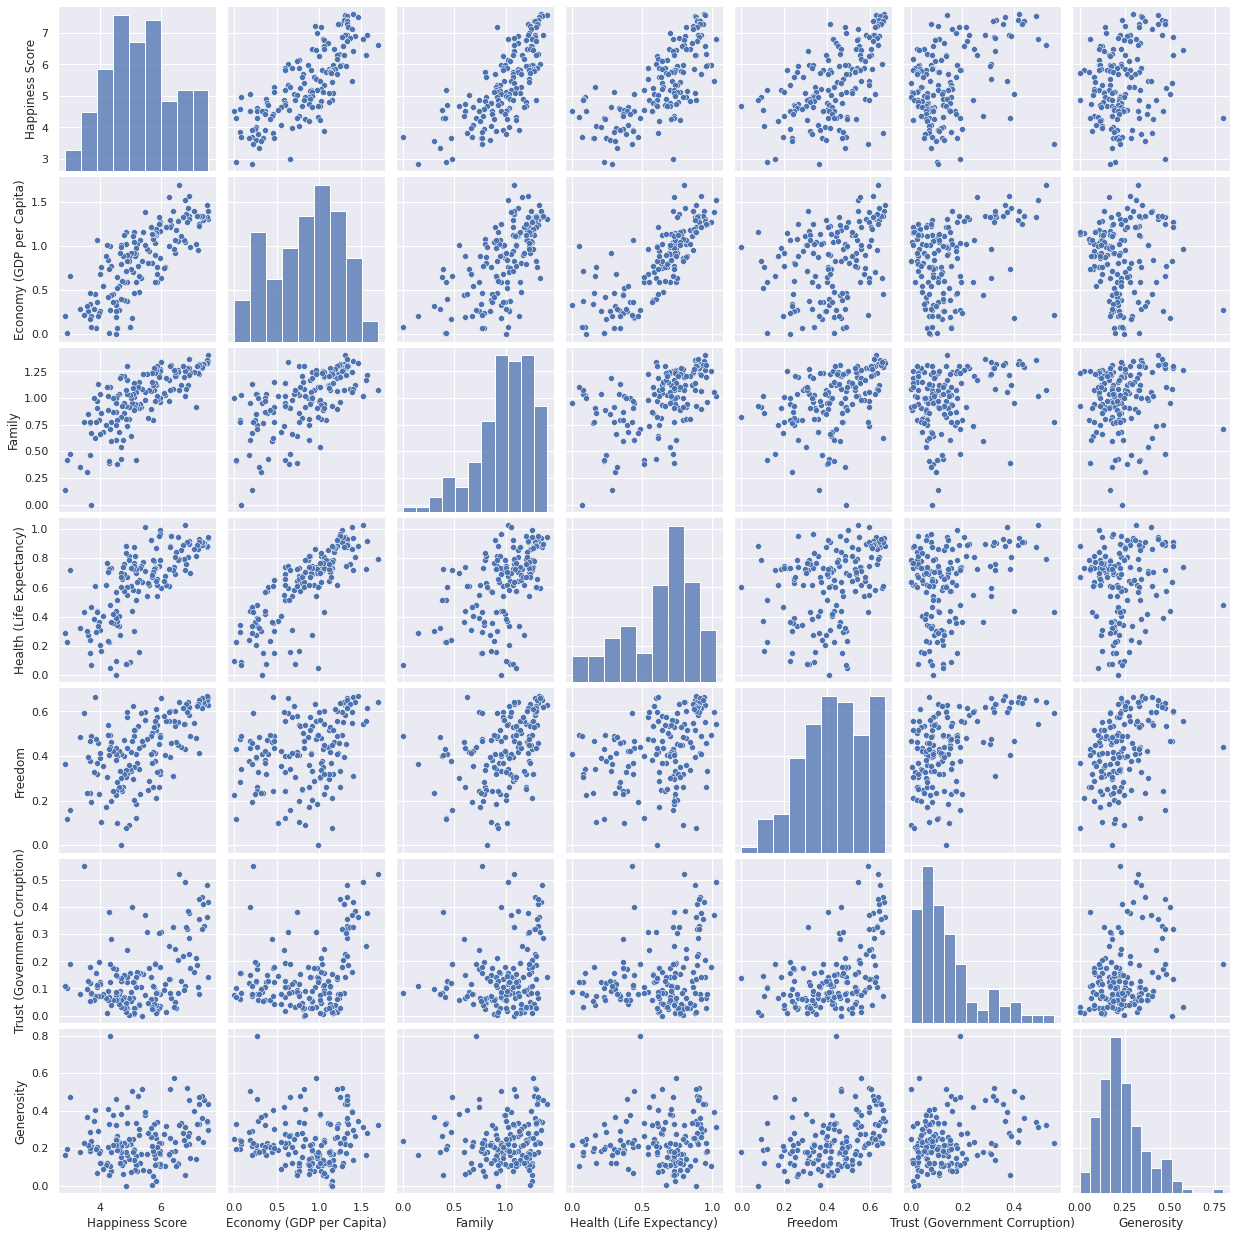

In [14]:
sns.set()

correlation_2015_df = happiness_2015_df.copy()
correlation_2015_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)

sns.pairplot(
    data = correlation_2015_df,
)
plt.show()

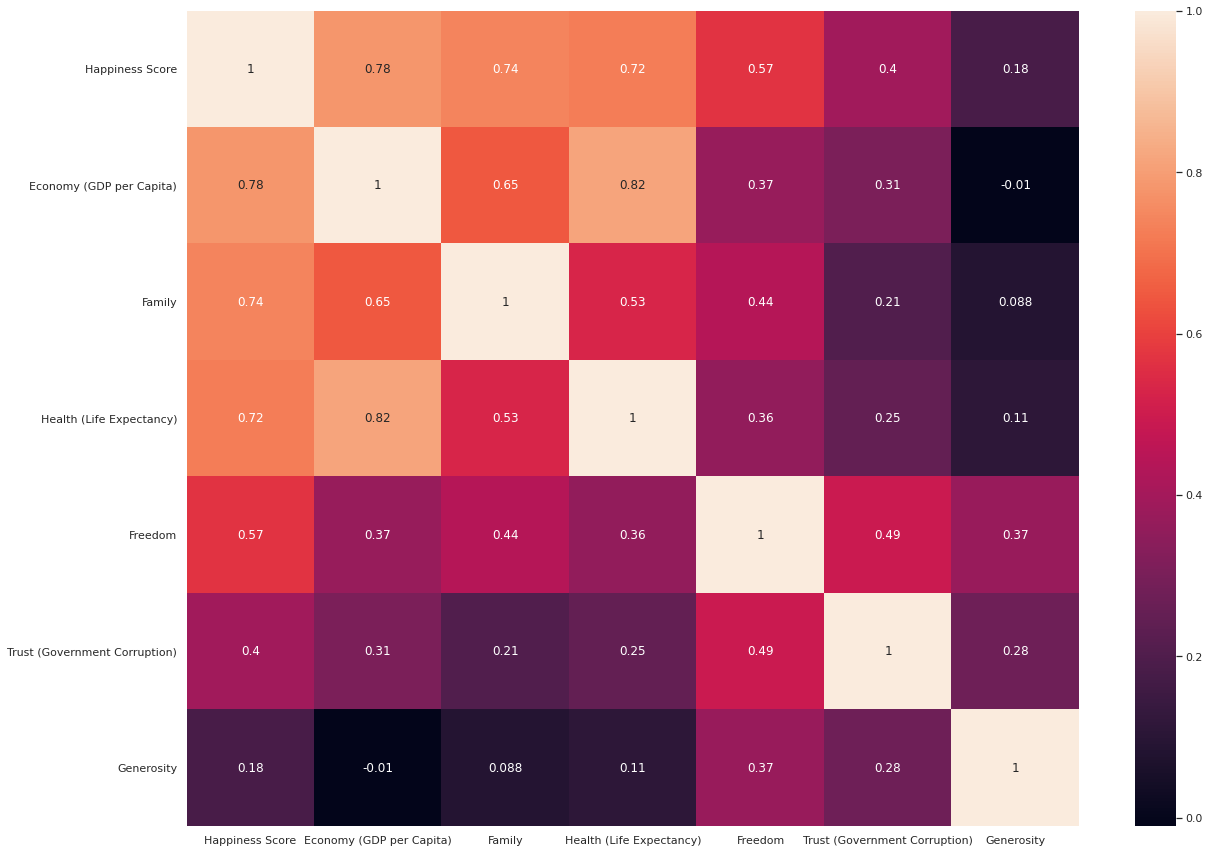

In [15]:
correlation_2015_df = correlation_2015_df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(
    correlation_2015_df,
    annot=True,
)
plt.show()

In 2015:
* The variables which are most strongly correlated to Happiness Score are Economy (0.78), Family (0.74), and Health (0.72).
* The variable which is moderately correlated to Happiness Score is Freedom (0.57).
* The variables which are weakly correlated to Happiness Score are Trust (0.4), and Generosity (0.18).
* The variables which are strongly correlated to Happiness Score are also moderately to strongly correlated to each other, with the strongest being Economy to Health (0.81), and the weakest being Health to Family (0.53).
* The Freedom and Trust variables are moderately correlated to each other (0.49).
* The Generosity variable is weakly correlated to both Freedom (0.37) and Trust (0.28), which is a stronger correlation than that of Generosity to Happiness Score (0.18)

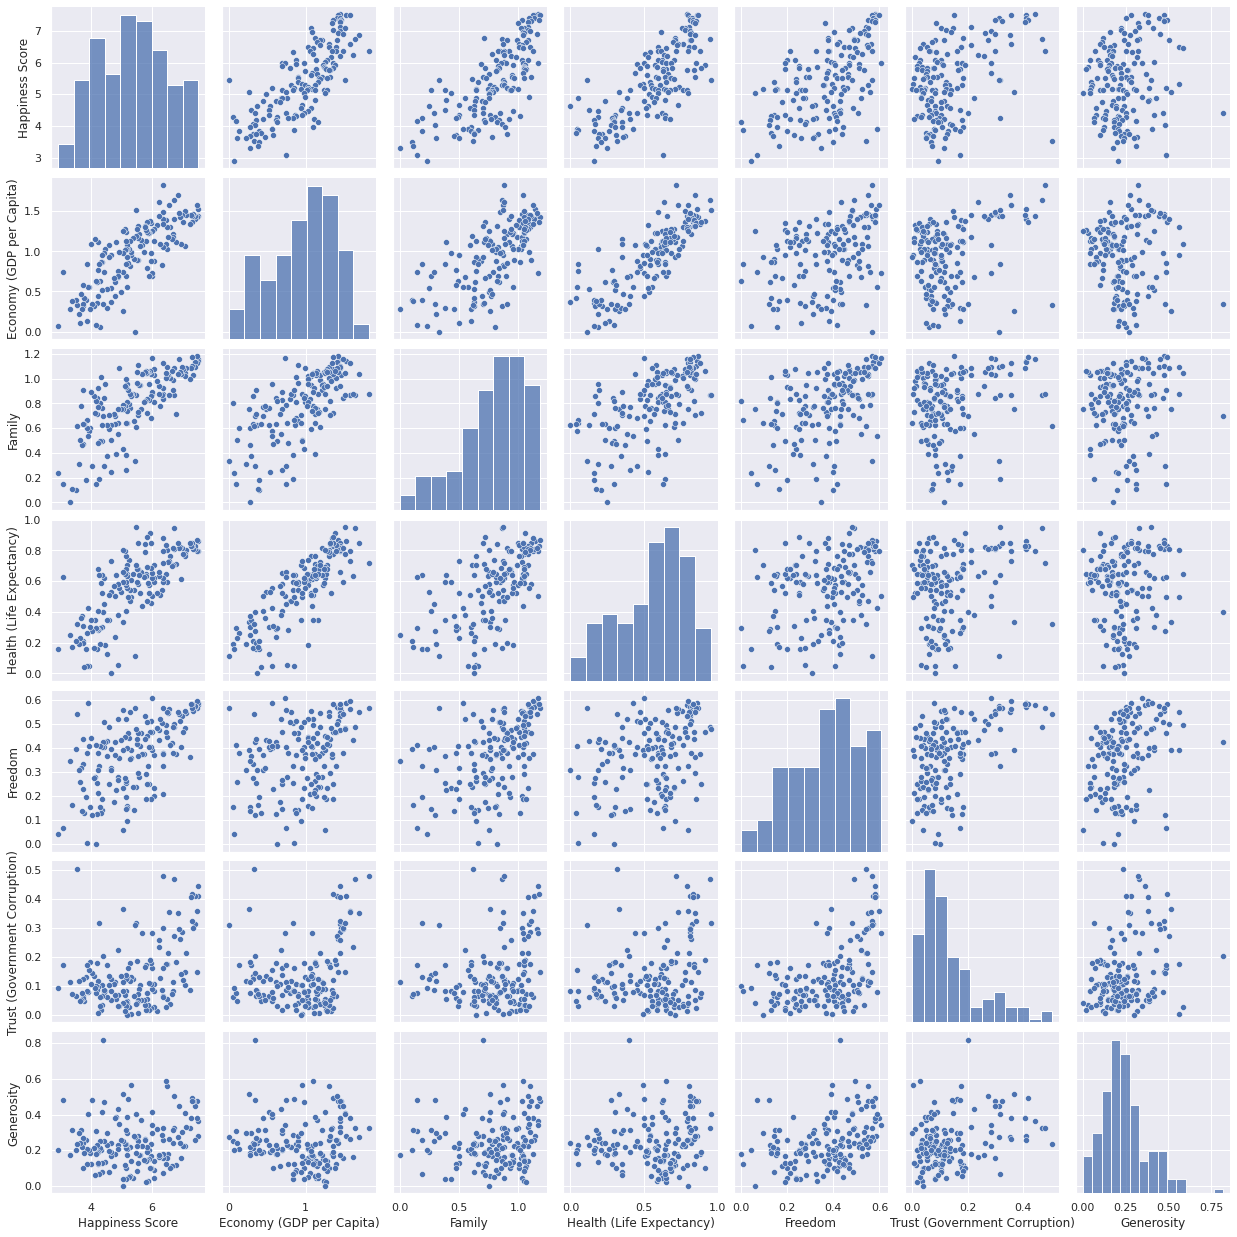

In [16]:
correlation_2016_df = happiness_2016_df.copy()
correlation_2016_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)

sns.pairplot(
    data = correlation_2016_df,
)
plt.show()

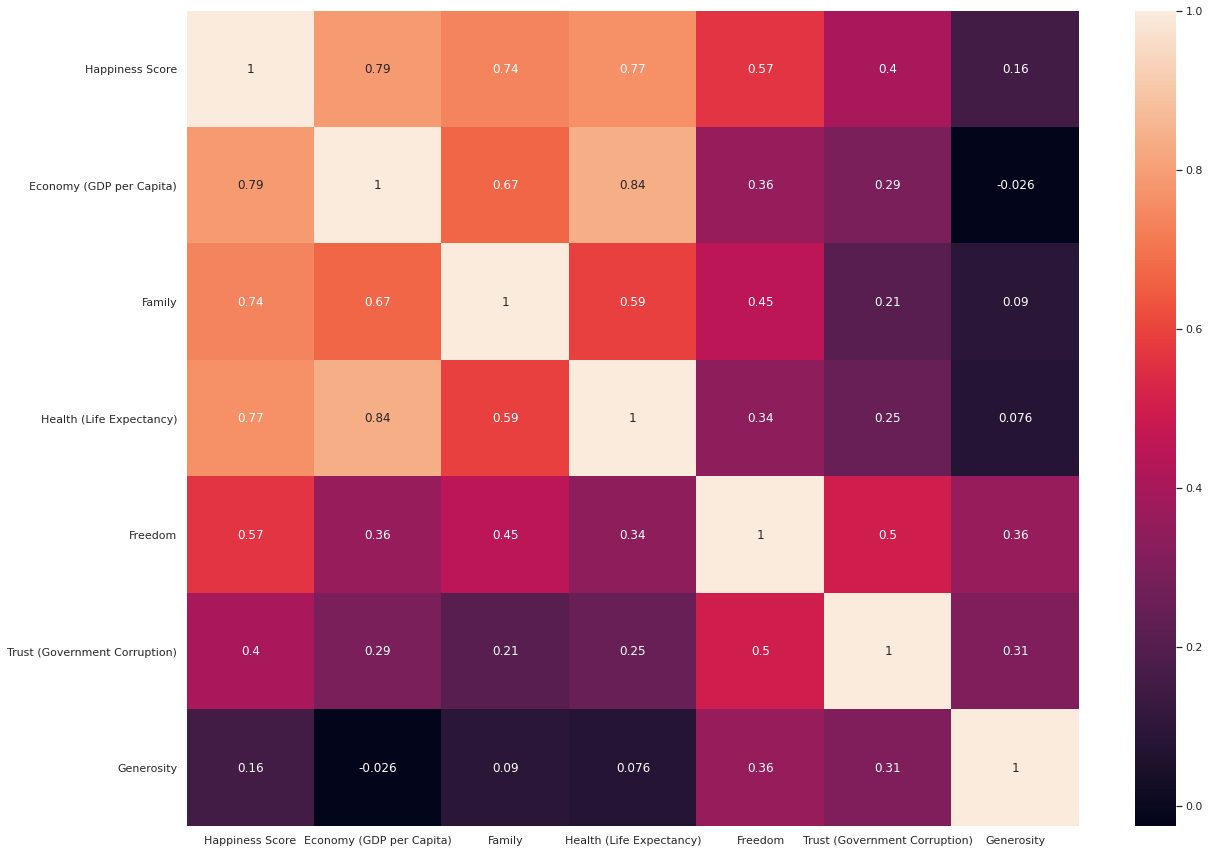

In [17]:
correlation_2016_df = correlation_2016_df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(
    correlation_2016_df,
    annot=True,
)
plt.show()

In 2016:
* The variables which are most strongly correlated to Happiness Score are Economy (0.79), Family (0.74), and Health (0.77).
* The variable which is moderately correlated to Happiness Score is Freedom (0.57).
* The variables which are weakly correlated to Happiness Score are Trust (0.4), and Generosity (0.16).
* The variables which are strongly correlated to Happiness Score are also moderately to strongly correlated to each other, with the strongest being Economy to Health (0.84), and the weakest being Health to Family (0.59).
* The Freedom and Trust variables are moderately correlated to each other (0.5).
* The Generosity variable is weakly correlated to both Freedom (0.36) and Trust (0.31), which is a stronger correlation than that of Generosity to Happiness Score (0.16)

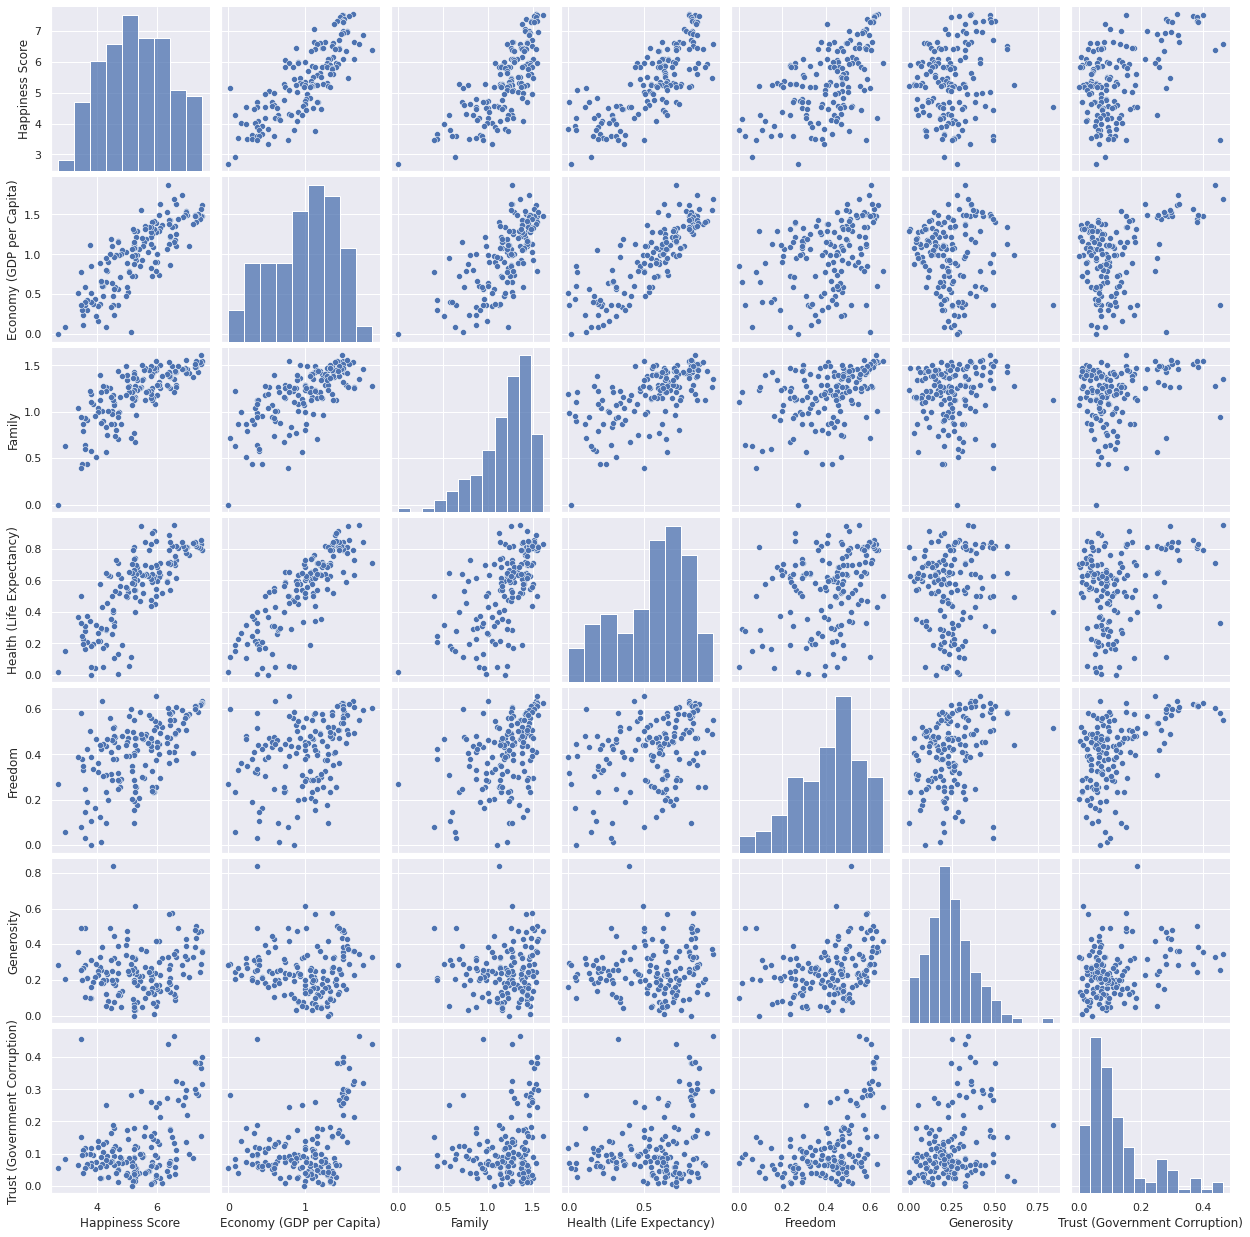

In [18]:
correlation_2017_df = happiness_2017_df.copy()
correlation_2017_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)

sns.pairplot(
    data = correlation_2017_df,
)
plt.show()

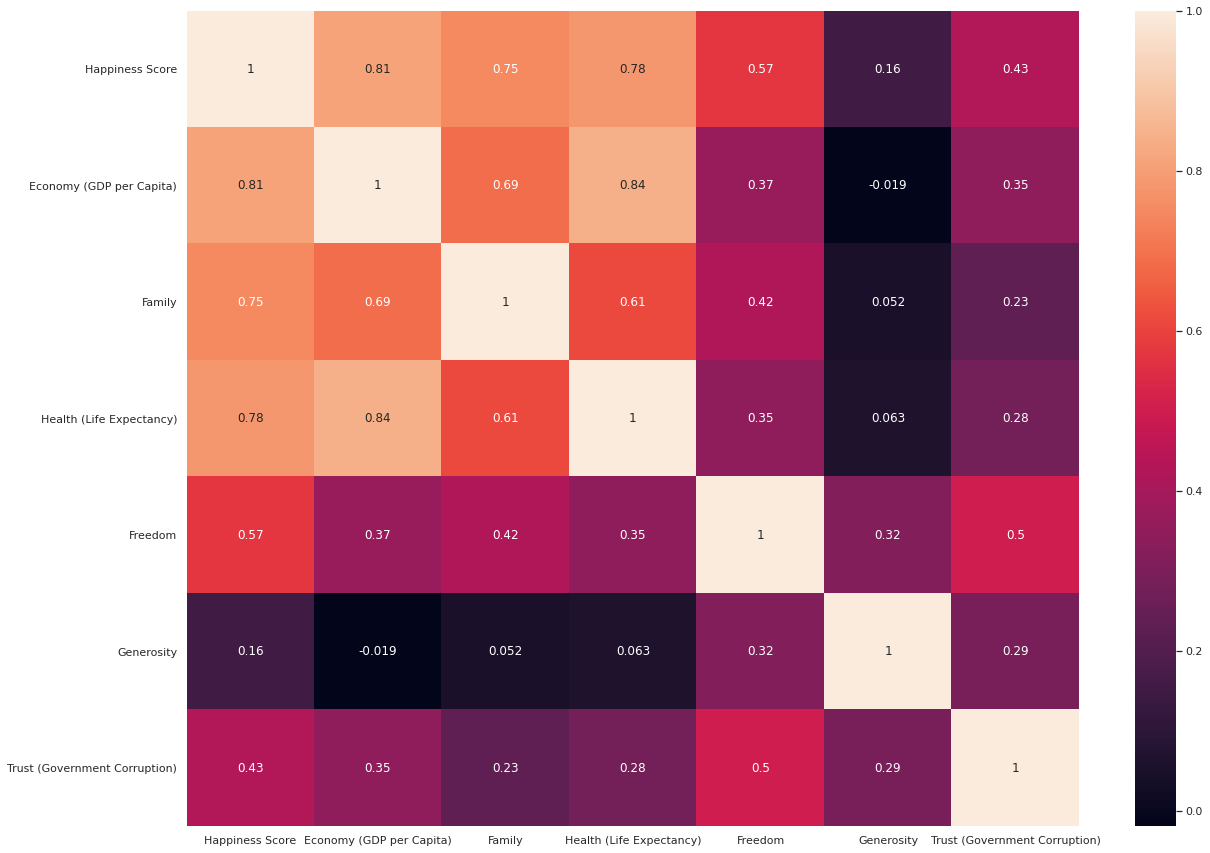

In [19]:
correlation_2017_df = correlation_2017_df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(
    correlation_2017_df,
    annot=True,
)
plt.show()

In 2017:
* The variables which are most strongly correlated to Happiness Score are Economy (0.81), Family (0.75), and Health (0.78).
* The variable which is moderately correlated to Happiness Score is Freedom (0.57).
* The variables which are weakly correlated to Happiness Score are Trust (0.43), and Generosity (0.16).
* The variables which are strongly correlated to Happiness Score are also moderately to strongly correlated to each other, with the strongest being Economy to Health (0.84), and the weakest being Health to Family (0.61).
* The Freedom and Trust variables are moderately correlated to each other (0.5).
* The Generosity variable is weakly correlated to both Freedom (0.32) and Trust (0.3), which is a stronger correlation than that of Generosity to Happiness Score (0.16)

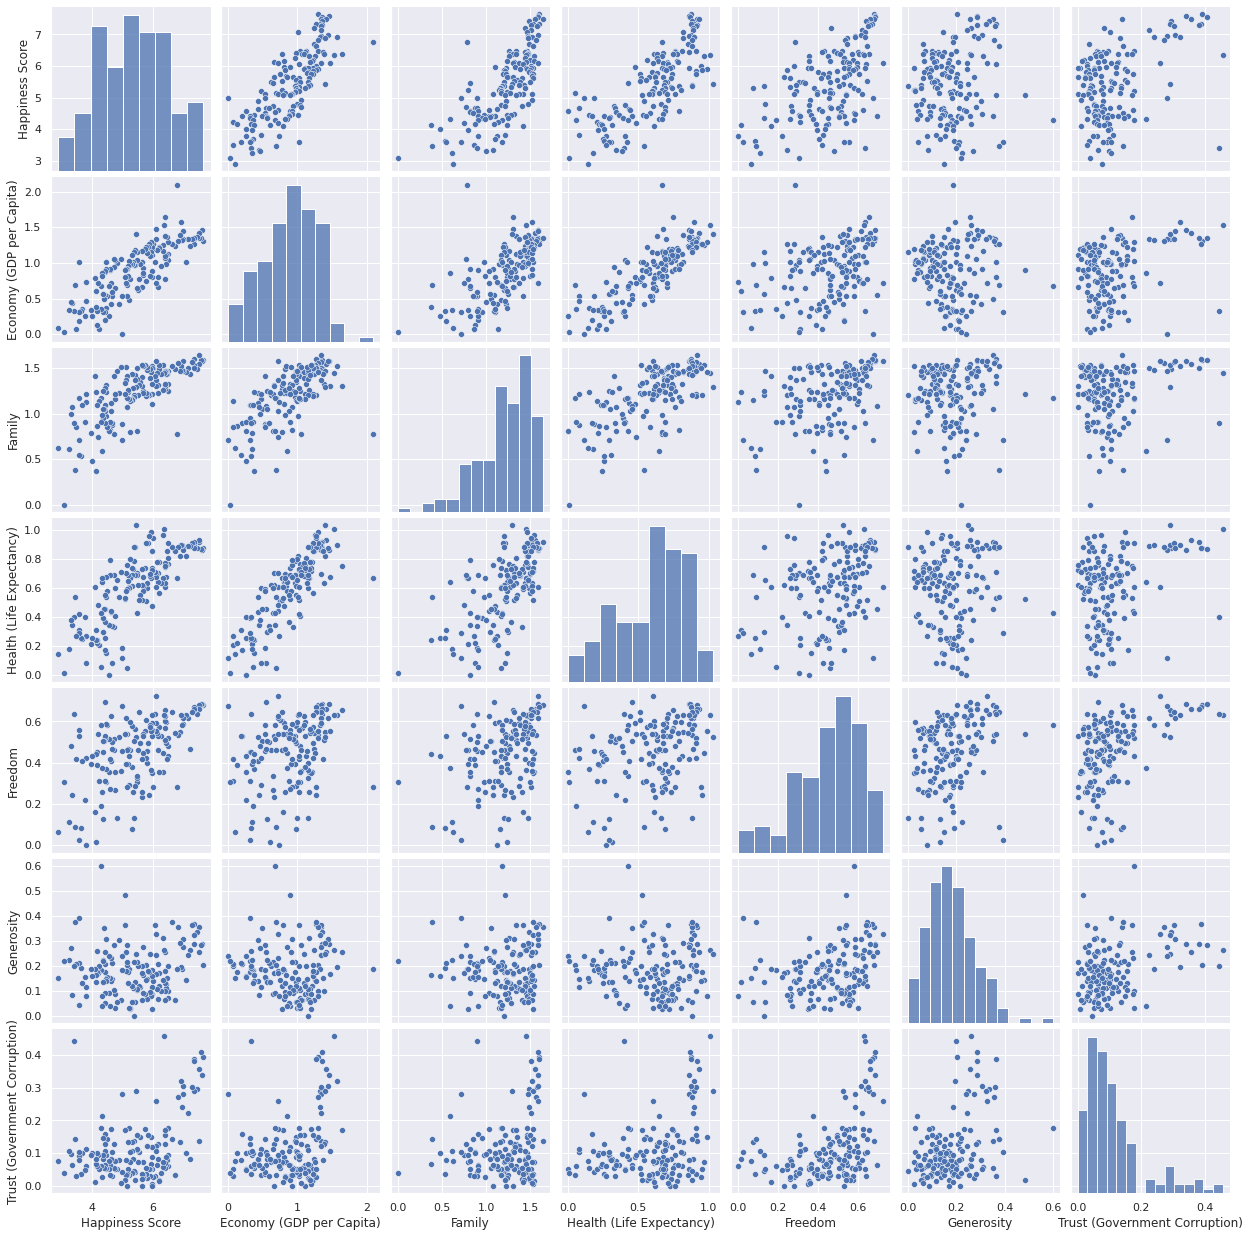

In [20]:
correlation_2018_df = happiness_2018_df.copy()
correlation_2018_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)

sns.pairplot(
    data = correlation_2018_df,
)
plt.show()

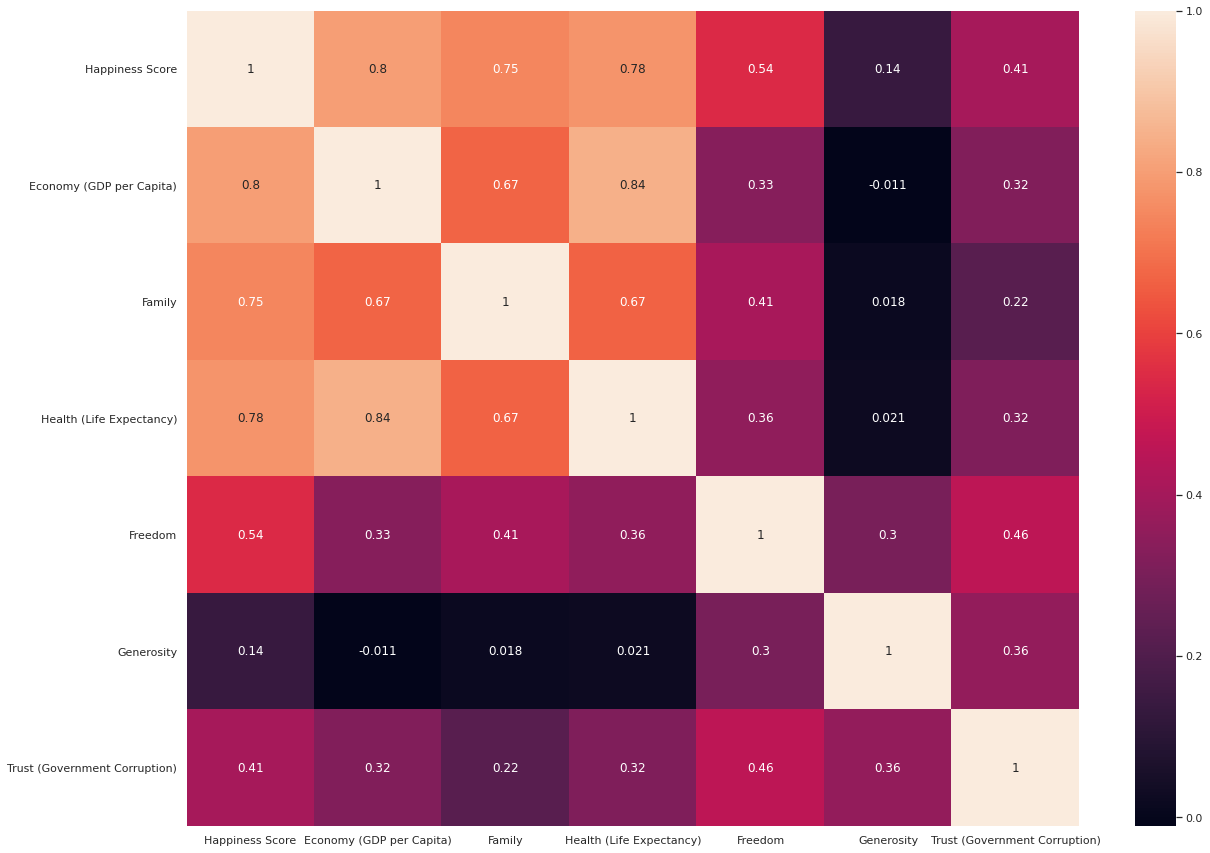

In [21]:
correlation_2018_df = correlation_2018_df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(
    correlation_2018_df,
    annot=True,
)
plt.show()

In 2018:
* The variables which are most strongly correlated to Happiness Score are Economy (0.8), Family (0.75), and Health (0.78).
* The variable which is moderately correlated to Happiness Score is Freedom (0.54).
* The variables which are weakly correlated to Happiness Score are Trust (0.41), and Generosity (0.14).
* The variables which are strongly correlated to Happiness Score are also moderately to strongly correlated to each other, with the strongest being Economy to Health (0.84), and the weakest being Health to Family (0.67).
* The Freedom and Trust variables are moderately correlated to each other (0.46).
* The Generosity variable is weakly correlated to both Freedom (0.3) and Trust (0.36), which is a stronger correlation than that of Generosity to Happiness Score (0.14)

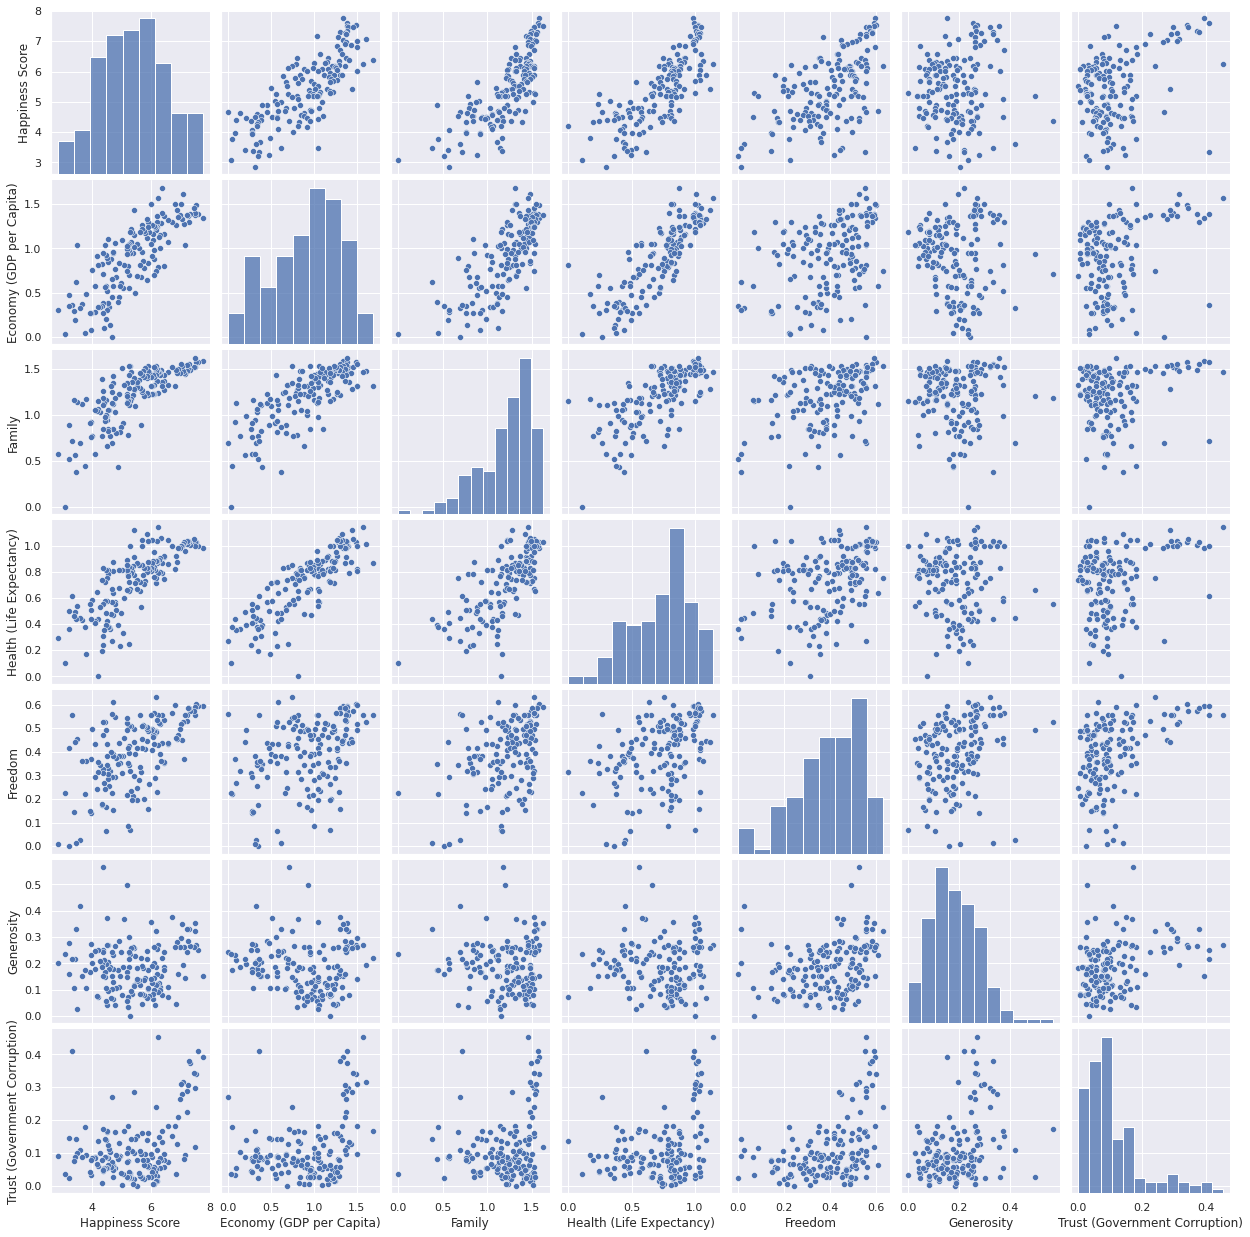

In [22]:
correlation_2019_df = happiness_2019_df.copy()
correlation_2019_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)

sns.pairplot(
    data = correlation_2019_df,
)
plt.show()

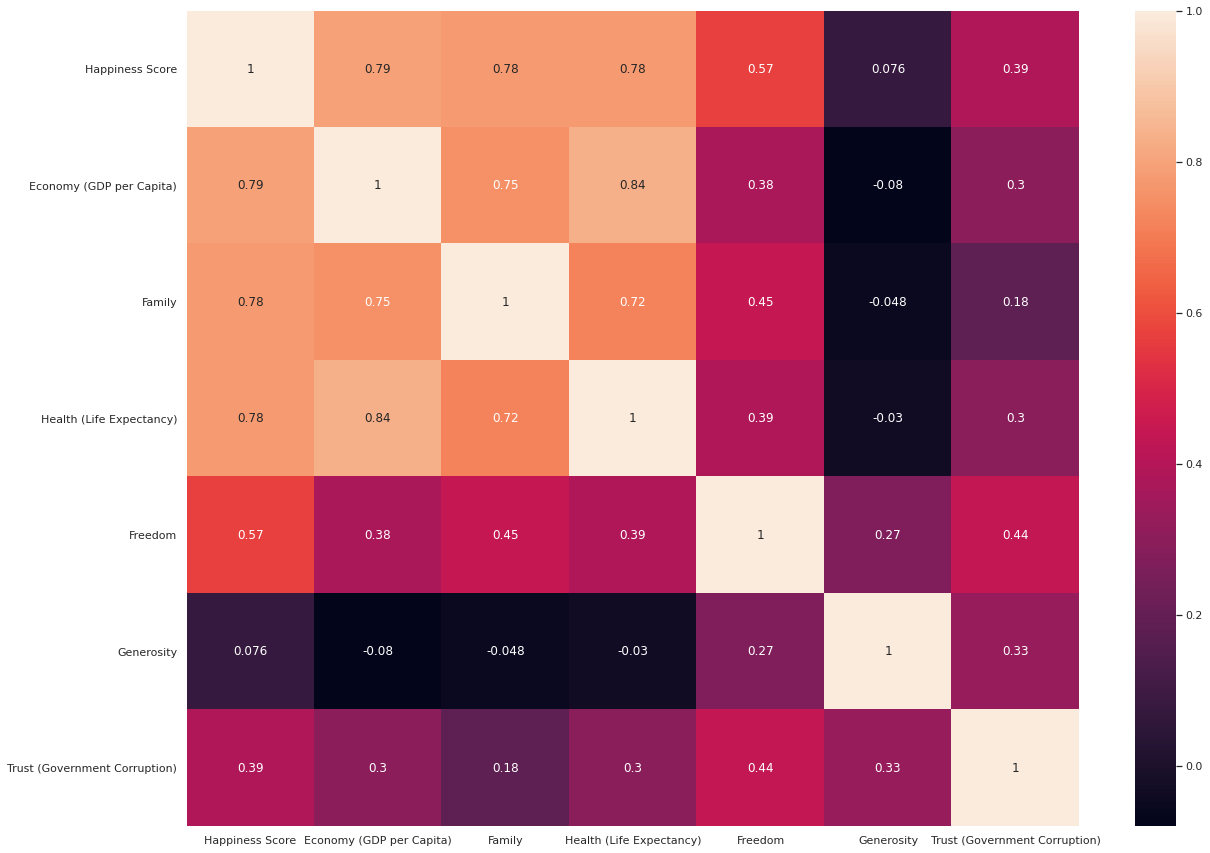

In [23]:
correlation_2019_df = correlation_2019_df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(
    correlation_2019_df,
    annot=True,
)
plt.show()

In 2019:
* The variables which are most strongly correlated to Happiness Score are Economy (0.79), Family (0.78), and Health (0.78).
* The variable which is moderately correlated to Happiness Score is Freedom (0.57).
* The variables which are weakly correlated to Happiness Score are Trust (0.39), and Generosity (0.08).
* The variables which are strongly correlated to Happiness Score are also moderately to strongly correlated to each other, with the strongest being Economy to Health (0.84), and the weakest being Health to Family (0.72).
* The Freedom and Trust variables are moderately correlated to each other (0.44).
* The Generosity variable is weakly correlated to both Freedom (0.27) and Trust (0.33), which is a stronger correlation than that of Generosity to Happiness Score (0.08)

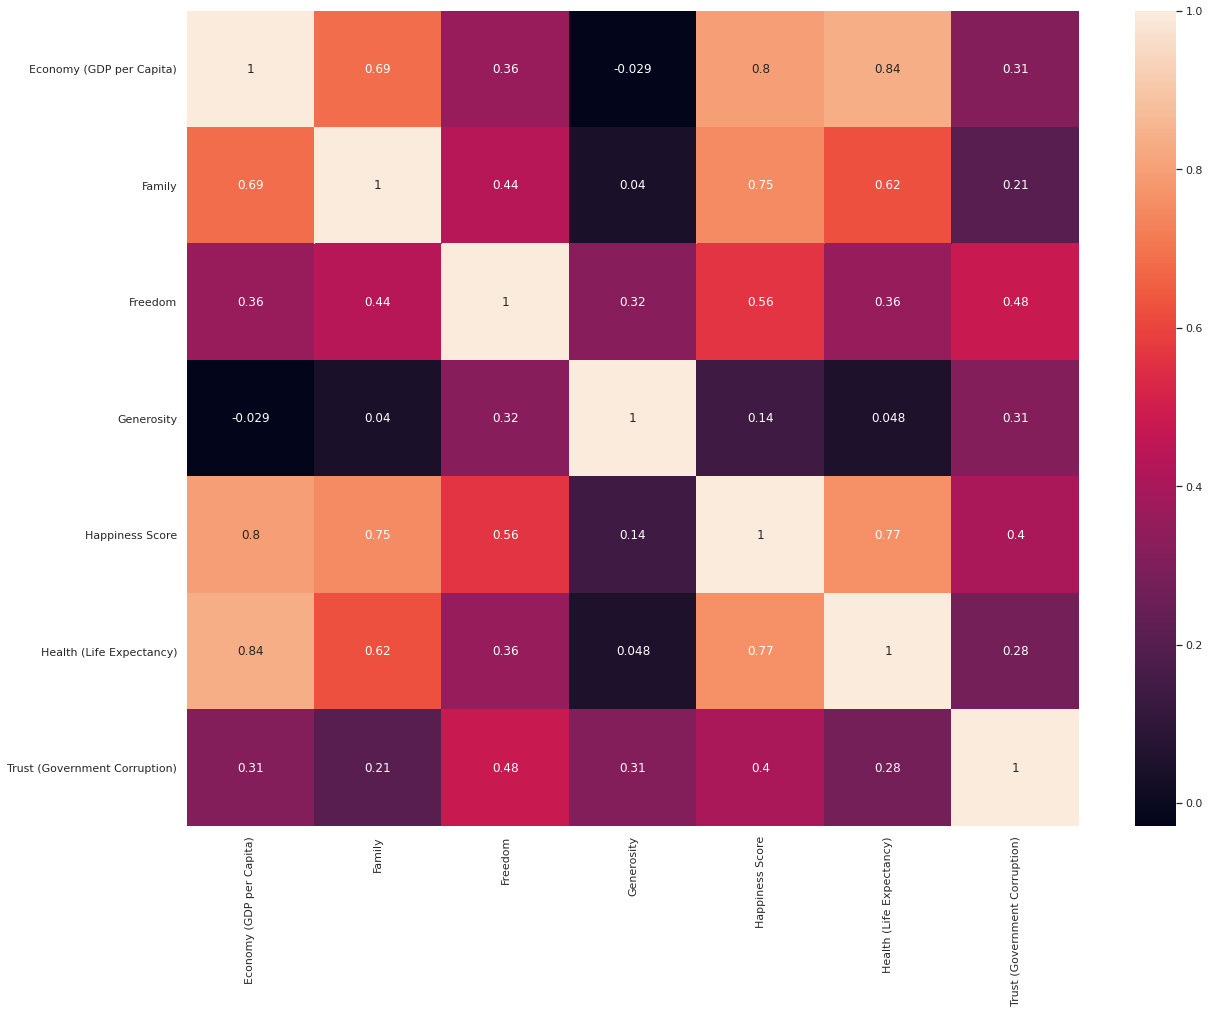

In [24]:
correlation_mean_df = (correlation_2015_df.add(correlation_2016_df).add(correlation_2017_df).add(correlation_2018_df).add(correlation_2019_df)) / NUM_DATASET
plt.figure(figsize = (20,15))
sns.heatmap(
    correlation_mean_df,
    annot=True,
)
plt.show()

Across 2015-2019:
* The variables which are most strongly correlated to Happiness Score are Economy (0.8), Family (0.75), and Health (0.77).
* The variable which is moderately correlated to Happiness Score is Freedom (0.56).
* The variables which are weakly correlated to Happiness Score are Trust (0.4), and Generosity (0.14).
* The variables which are strongly correlated to Happiness Score are also moderately to strongly correlated to each other, with the strongest being Economy to Health (0.84), and the weakest being Health to Family (0.62).
* The Freedom and Trust variables are moderately correlated to each other (0.48).
* The Generosity variable is weakly correlated to both Freedom (0.32) and Trust (0.31), which is a stronger correlation than that of Generosity to Happiness Score (0.14)

The Economy, Health, and Family variables seem to be the most influential variables to Happiness Score, being strongly correlated to it. They are also strongly correlated to each other. The correlation between Health and Family has been increasing steadily since 2015.

Generosity seems to be the least influential variable, with a very weak to almost zero correlation to Happiness Score, a weak correlation to Trust and Freedom, and no correlation to the other variables. Its correlation to Happiness Score is decreasing every year, and by 2019 is more than half the value of that in 2015.

## How has the distribution of Happiness Score changed over the years 2015-2019?

To answer this question, we will analyse the distributions of the Happiness Score variable for all countries in each year and compare them to each other. Firstly, we will visualise these distributions both as histogram plots and as density plots.

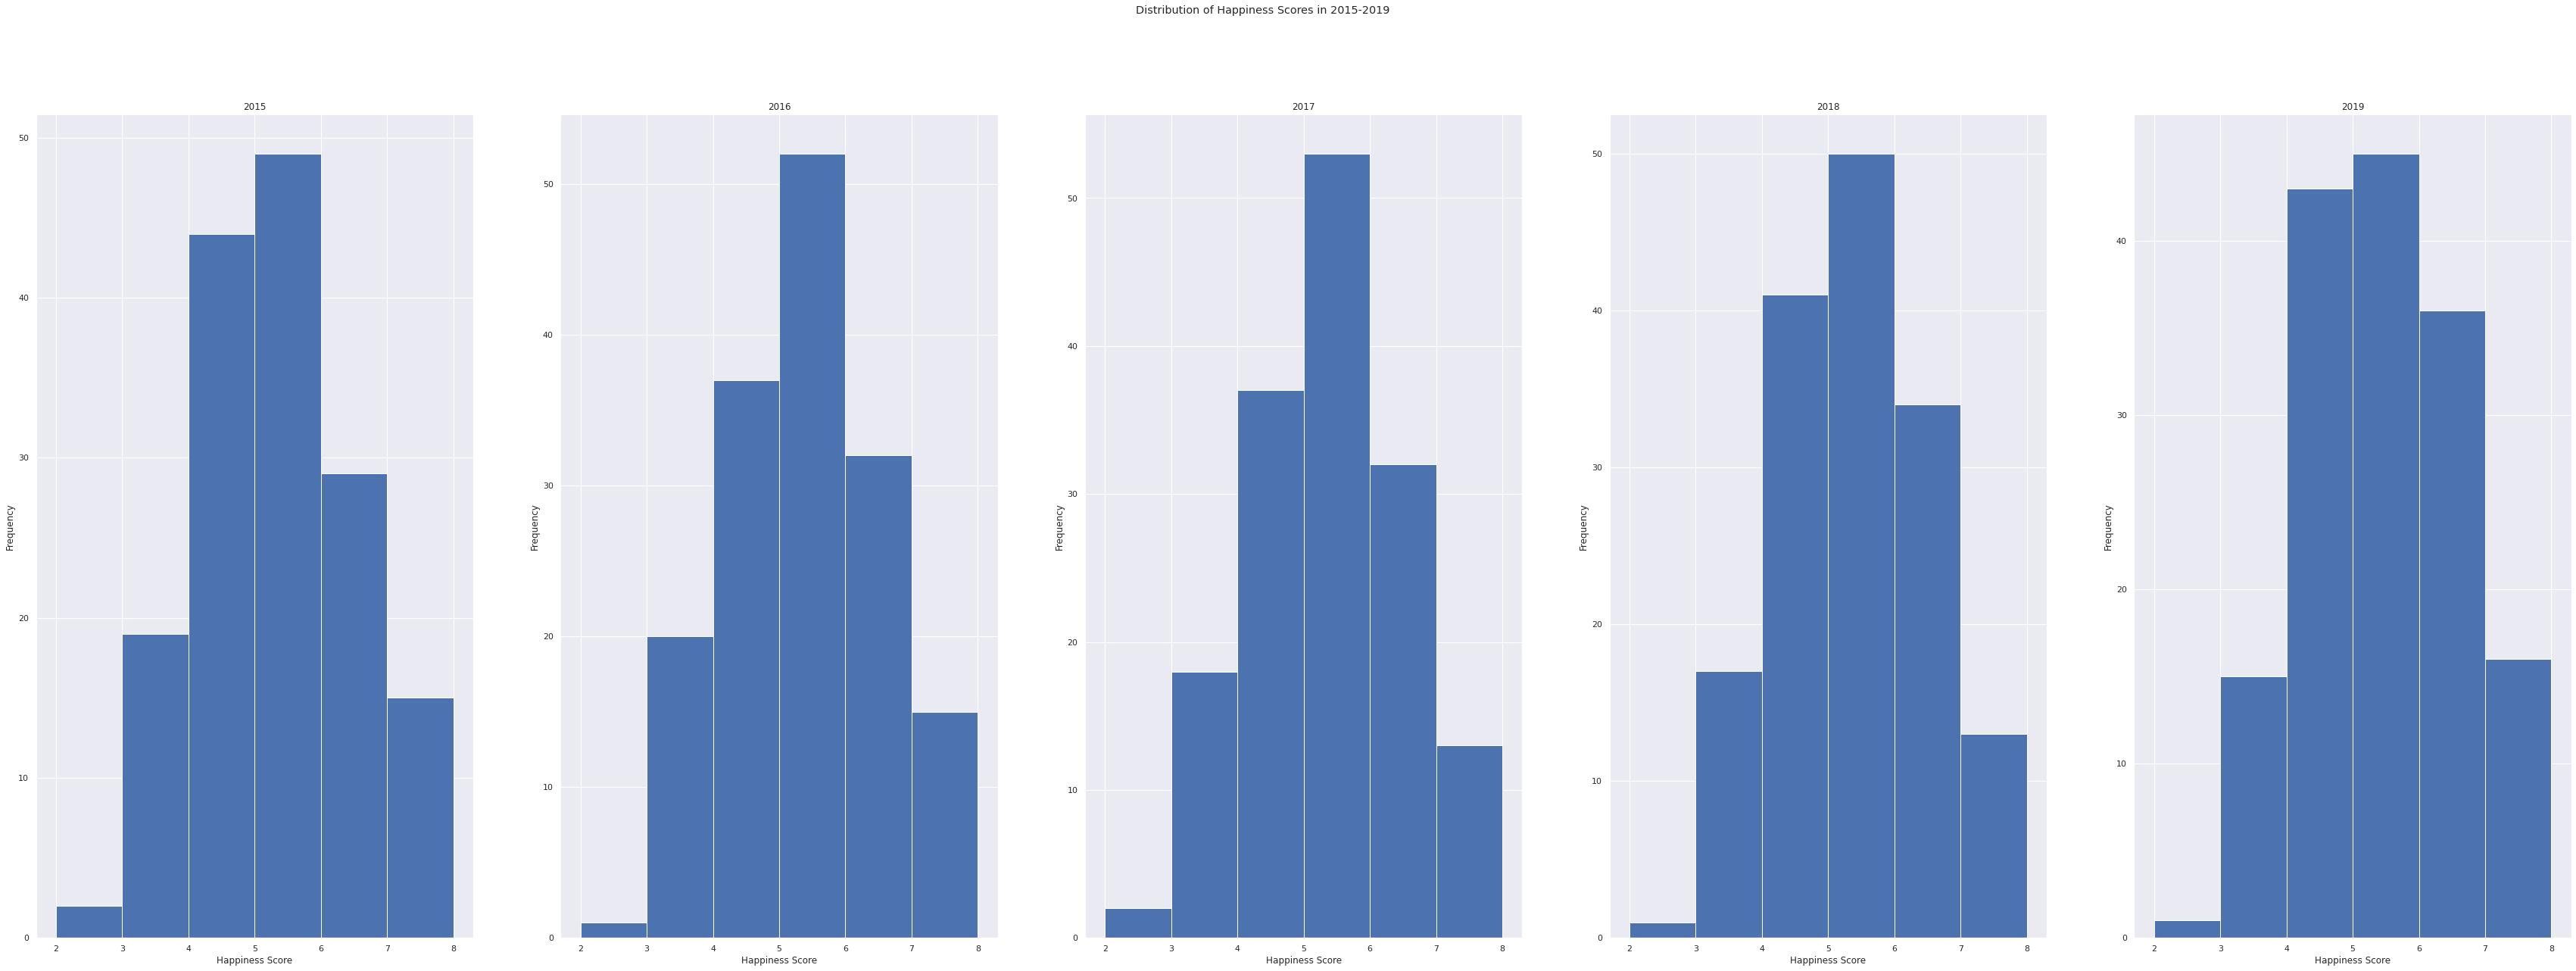

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (60, 20))
fig.suptitle("Distribution of Happiness Scores in 2015-2019")

happiness_2015_df["Happiness Score"].plot(
    kind = "hist",
    ax = ax1,
    bins = range(2,9),    
)
ax1.set_title("2015")
ax1.set_xlabel("Happiness Score")

happiness_2016_df["Happiness Score"].plot(
    kind = "hist",
    ax = ax2,
    bins = range(2,9),
)
ax2.set_title("2016")
ax2.set_xlabel("Happiness Score")

happiness_2017_df["Happiness Score"].plot(
    kind = "hist",
    ax = ax3,
    bins = range(2,9),
)
ax3.set_title("2017")
ax3.set_xlabel("Happiness Score")

happiness_2018_df["Happiness Score"].plot(
    kind = "hist",
    ax = ax4,
    bins = range(2,9),
)
ax4.set_title("2018")
ax4.set_xlabel("Happiness Score")

happiness_2019_df["Happiness Score"].plot(
    kind = "hist",
    ax = ax5,
    bins = range(2,9),
)
ax5.set_title("2019")
ax5.set_xlabel("Happiness Score")
plt.show()

The Happiness Scores are all greater than 2, but less than 8, with a mostly symmetrical distribution around the middle score of 5. It seems that the distribution is slightly shifting to the right with each year. As the increasing trend of the mean and maximum of the Happiness Score variable from 2015-2019 hinted at, it seems that happiness has slightly increased overall during this time period, with more countries having higher Happiness Scores. The lower third of the bins in the plots decrease in frequency, the middle third of the bins tend to increase in frequency, and the upper third of bins slightly increase in frequency as well.

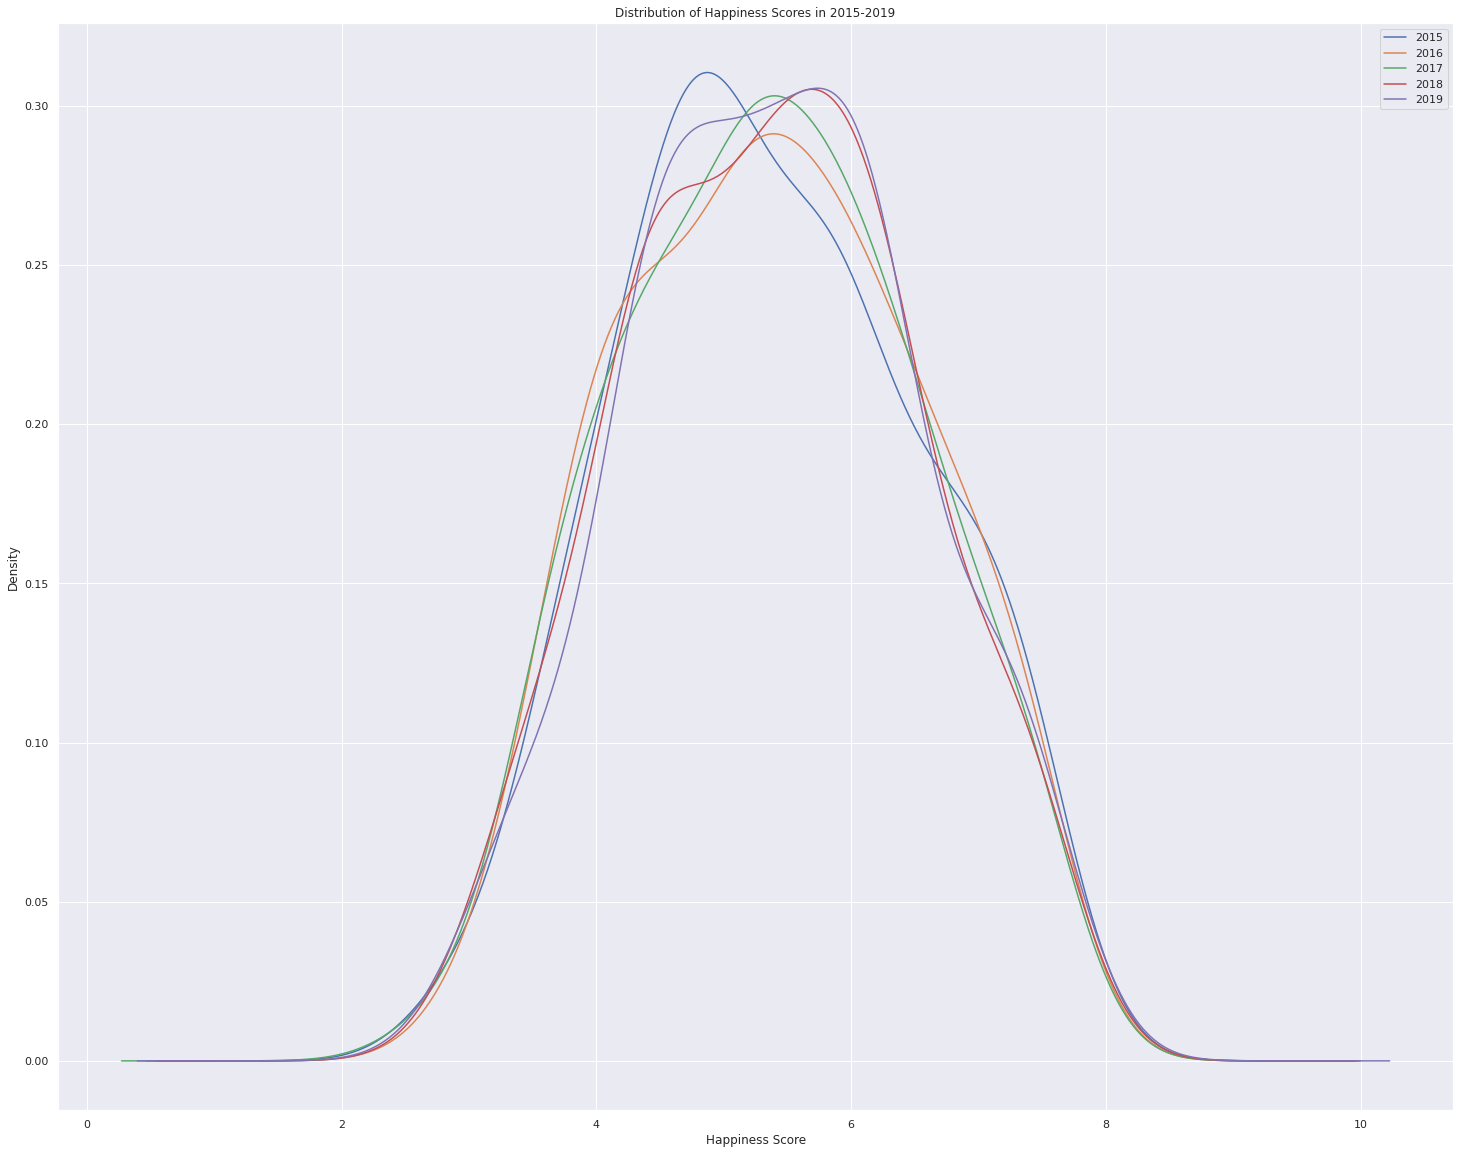

In [26]:
happiness_2015_df["Happiness Score"].name = "2015"
happiness_2016_df["Happiness Score"].name = "2016"
happiness_2017_df["Happiness Score"].name = "2017"
happiness_2018_df["Happiness Score"].name = "2018"
happiness_2019_df["Happiness Score"].name = "2019"

happiness_2015_df["Happiness Score"].plot(
    kind = "density",
    figsize = (25,20),
    title = "Distribution of Happiness Scores in 2015-2019",
    legend = True
)
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
happiness_2016_df["Happiness Score"].plot(
    kind = "density",
    legend = True
)
happiness_2017_df["Happiness Score"].plot(
    kind = "density",
    legend = True
)
happiness_2018_df["Happiness Score"].plot(
    kind = "density",
    legend = True
)
happiness_2019_df["Happiness Score"].plot(
    kind = "density",
    legend = True
)
plt.show()

As expected, the shifting of the distrubtion to the right as the year increases is confirmed when we visualise the data as density plots overlaid on each other.

## What percentage of countries have Happiness Scores greater than, and less than, the middle Happiness Score?

As we have seen above, the middle Happiness Score is 5. To answer this question, we will determine the percentage of countries with scores greater than the middle score of 5 in each yearly dataframe and then compare these percentages.

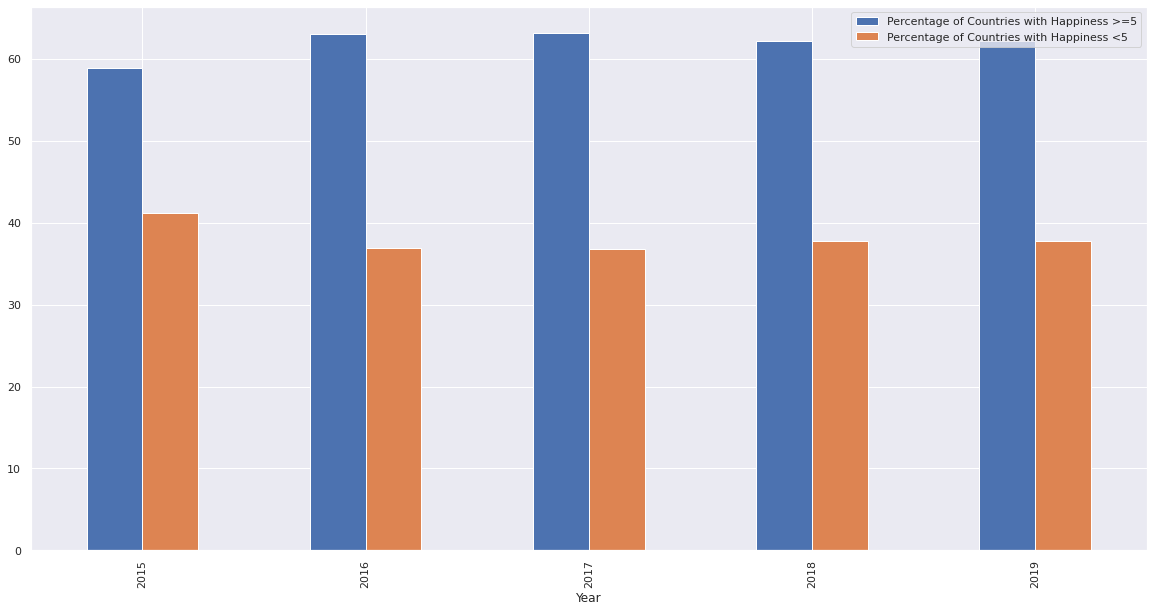

In [27]:
happiness_high_range_2015_df = happiness_2015_df[happiness_2015_df["Happiness Score"] >= 5]
country_high_range_2015_percentage = 100 * happiness_high_range_2015_df.shape[0] / happiness_2015_df.shape[0]
country_low_range_2015_percentage = 100 - country_high_range_2015_percentage

happiness_high_range_2016_df = happiness_2016_df[happiness_2016_df["Happiness Score"] >= 5]
country_high_range_2016_percentage = 100 * happiness_high_range_2016_df.shape[0] / happiness_2016_df.shape[0]
country_low_range_2016_percentage = 100 - country_high_range_2016_percentage

happiness_high_range_2017_df = happiness_2017_df[happiness_2017_df["Happiness Score"] >= 5]
country_high_range_2017_percentage = 100 * happiness_high_range_2017_df.shape[0] / happiness_2017_df.shape[0]
country_low_range_2017_percentage = 100 - country_high_range_2017_percentage

happiness_high_range_2018_df = happiness_2018_df[happiness_2018_df["Happiness Score"] >= 5]
country_high_range_2018_percentage = 100 * happiness_high_range_2018_df.shape[0] / happiness_2018_df.shape[0]
country_low_range_2018_percentage = 100 - country_high_range_2018_percentage

happiness_high_range_2019_df = happiness_2019_df[happiness_2019_df["Happiness Score"] >= 5]
country_high_range_2019_percentage = 100 * happiness_high_range_2019_df.shape[0] / happiness_2019_df.shape[0]
country_low_range_2019_percentage = 100 - country_high_range_2019_percentage

df = pd.DataFrame([
    ["2015", country_high_range_2015_percentage, country_low_range_2015_percentage],
    ["2016", country_high_range_2016_percentage, country_low_range_2016_percentage],
    ["2017", country_high_range_2017_percentage, country_low_range_2017_percentage],
    ["2018", country_high_range_2018_percentage, country_low_range_2018_percentage],
    ["2019", country_high_range_2019_percentage, country_low_range_2019_percentage],
])
df.columns = ["Year", "Percentage of Countries with Happiness >=5", "Percentage of Countries with Happiness <5"]
df.plot(
    kind = "bar",
    x = "Year",
    figsize = (20, 10)
)
plt.show()

This comparison shows that the percentage of countries with Happiness Scores in the upper half of the distribution has steadily increased from 2015 to 2019, and similarly the percentage of countries with Happiness Scores in the lower half of the distribution has steadily decreased from 2015 to 2019. Hence, we can conclude that happiness has increased overall in the same time period.

## Where does Australia rank in Happiness Score from 2015-2019, and how does each variable change during the same time period?

To answer this question, we will create a new dataframe australia_df that only contains the rows of data for Australia grouped and plotted by year.

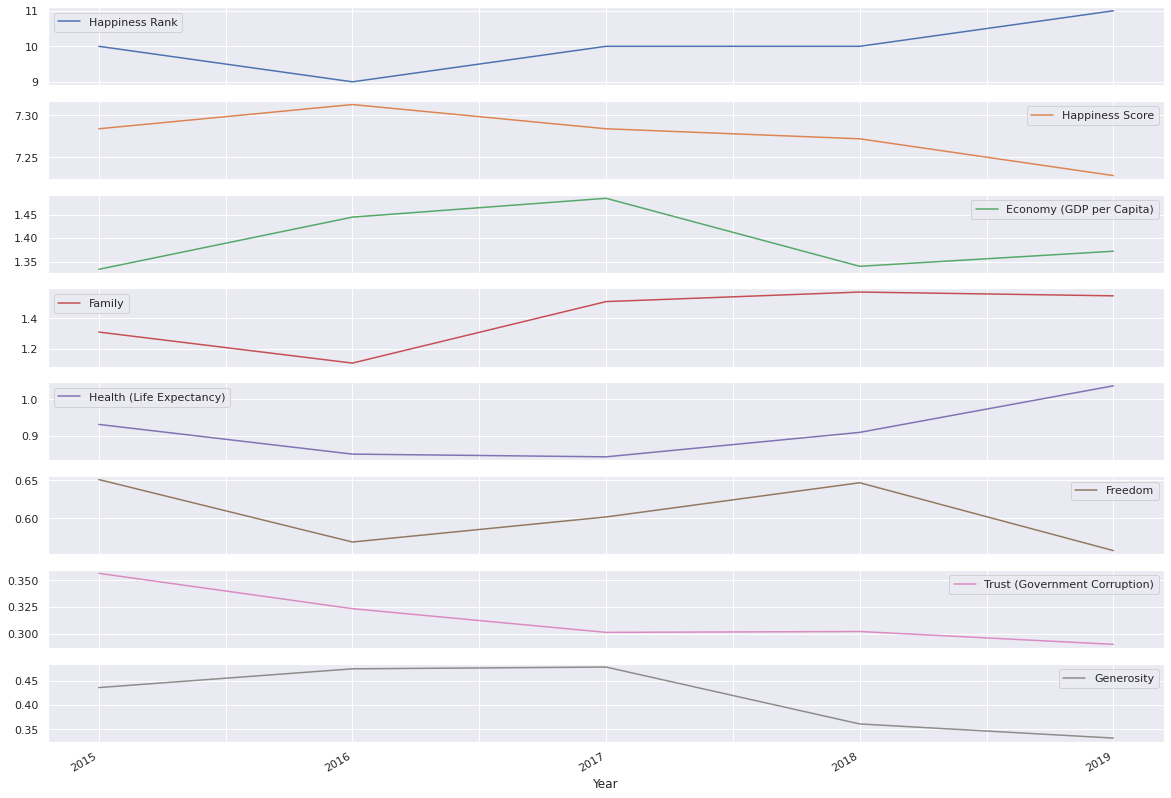

In [28]:
australia_df = happiness_full_df[happiness_full_df["Country"] == "Australia"]
australia_df = australia_df.groupby(["Year"]).mean()
australia_df.plot(
    figsize = (20, 15),
    subplots = True
)
plt.show()

Australia's Happiness Rank has remained quite stable between 2015-2019, with a low of 11 in 2019 and a high of 9 in 2016.
The Happiness Score has been steadily decreasing from 2016-2019.
The largest decrease in a variable was the decrease in Economy from 2017-2018. The Happiness Score only slightly decreased in this same period, as the decrease in Economy was offset by slight increases in every other variable except for Generosity.
The largest increase in a variable was in the increase in Family from 2016-2017. Despite this increase, and a decent increase in Economy, Freedom, and Generosity in the same period, the Happiness Score slightly decreased from 2016-2017.

## Which countries experienced the largest Happiness Rank increases and decreases in each year?

To answer this question, we will create a new dataframe happiness_rank_df containing a pivot table of the "Country" and "Year" columns of happiness_full_df and the "Happiness Rank" column values. We will then create a new dataframe happiness_rank_change_df that contains the difference of "Happiness Rank" between 2 yearly dataframes.

In [29]:
happiness_rank_df = happiness_full_df.pivot_table(
    index = "Country",
    columns = "Year",
    values = "Happiness Rank",
    aggfunc = "max"
)
happiness_rank_change_df = happiness_rank_df.rename(columns={"2015":"2015-2016","2016":"2016-2017", "2017":"2017-2018", "2018":"2018-2019"})
happiness_rank_change_df.drop("2019", axis=1, inplace=True)
happiness_rank_change_df["2015-2016"] = happiness_rank_df["2016"] - happiness_rank_df["2015"]
happiness_rank_change_df["2016-2017"] = happiness_rank_df["2017"] - happiness_rank_df["2016"]
happiness_rank_change_df["2017-2018"] = happiness_rank_df["2018"] - happiness_rank_df["2017"]
happiness_rank_change_df["2018-2019"] = happiness_rank_df["2019"] - happiness_rank_df["2018"]
happiness_rank_change_df.dropna(how="all", inplace=True)

Now, we sort the happiness_rank_change_df by each 2 year period and display the top 10 countries for brevity. Rank increases are defined as moving from a higher number to a lower number (eg. rank 10 to rank 4), and rank decreases are defined as moving from a lower number to a higher number (eg. rank 4 to rank 10). Hence, rank increases are negative numbers and rank decreases are positive numbers.

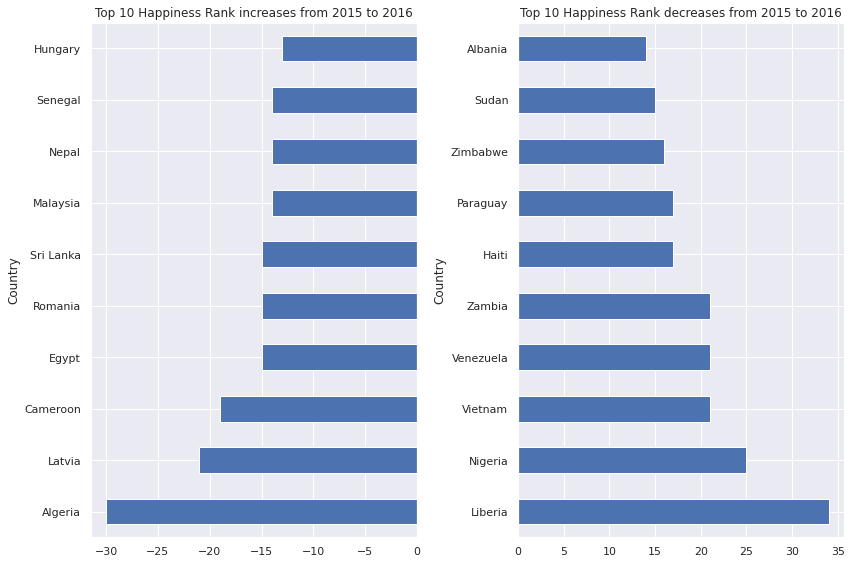

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 8))
happiness_rank_change_df.sort_values(by="2015-2016", inplace=True)
happiness_rank_change_df.iloc[:10,:1].plot(
    kind="barh",
    title="Top 10 Happiness Rank increases from 2015 to 2016",
    legend=False,
    ax = ax1,
)
happiness_rank_change_df.sort_values(by="2015-2016", ascending=False, inplace=True)
happiness_rank_change_df.iloc[:10,:1].plot(
    kind="barh",
    title="Top 10 Happiness Rank decreases from 2015 to 2016",
    legend = False,
    ax = ax2
)
plt.tight_layout()

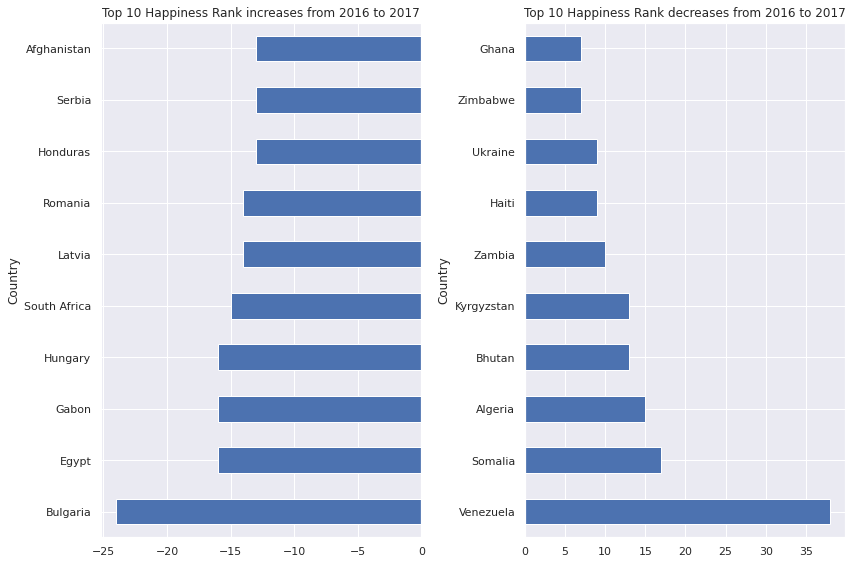

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 8))
happiness_rank_change_df.sort_values(by="2016-2017", inplace=True)
happiness_rank_change_df.iloc[:10,1:2].plot(
    kind="barh",
    title="Top 10 Happiness Rank increases from 2016 to 2017",
    legend=False,
    ax = ax1,
)
happiness_rank_change_df.sort_values(by="2016-2017", ascending=False, inplace=True)
happiness_rank_change_df.iloc[:10,1:2].plot(
    kind="barh",
    title="Top 10 Happiness Rank decreases from 2016 to 2017",
    legend=False,
    ax = ax2,
)
plt.tight_layout()

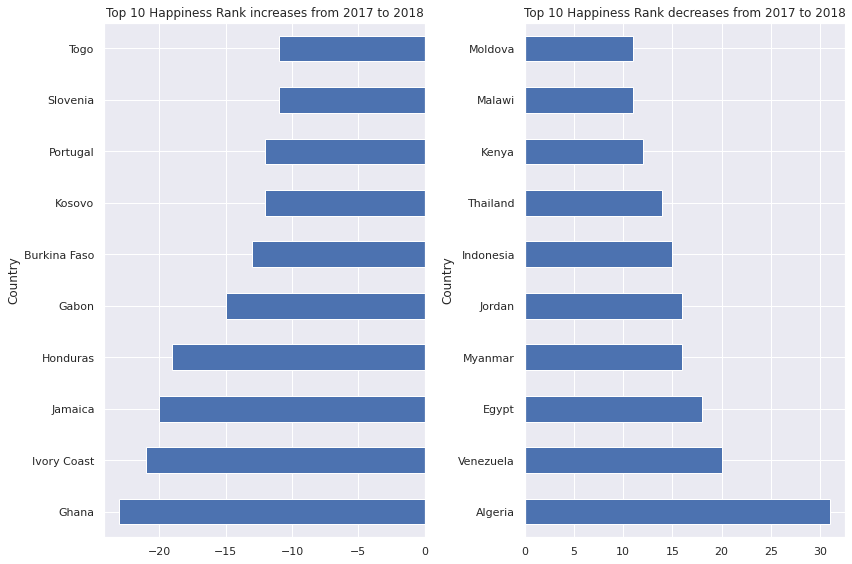

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 8))
happiness_rank_change_df.sort_values(by="2017-2018", inplace=True)
happiness_rank_change_df.iloc[:10,2:3].plot(
    kind="barh",
    title="Top 10 Happiness Rank increases from 2017 to 2018",
    legend=False,
    ax = ax1,
)
happiness_rank_change_df.sort_values(by="2017-2018", ascending=False, inplace=True)
happiness_rank_change_df.iloc[:10,2:3].plot(
    kind="barh",
    title="Top 10 Happiness Rank decreases from 2017 to 2018",
    legend=False,
    ax = ax2,
)
plt.tight_layout()

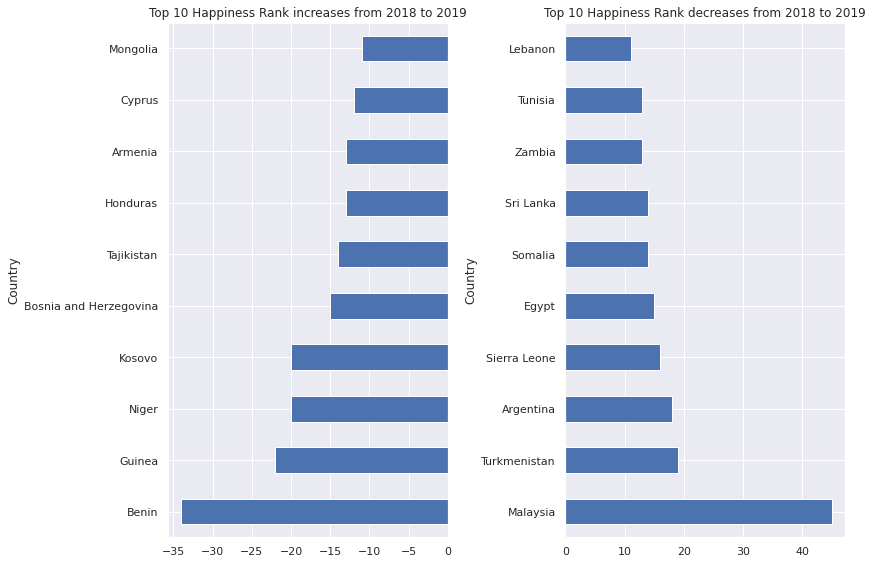

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 8))
happiness_rank_change_df.sort_values(by="2018-2019", inplace=True)
happiness_rank_change_df.iloc[:10,3:].plot(
    kind="barh",
    title="Top 10 Happiness Rank increases from 2018 to 2019",
    legend=False,
    ax = ax1,
)
happiness_rank_change_df.sort_values(by="2018-2019", ascending=False, inplace=True)
happiness_rank_change_df.iloc[:10,3:].plot(
    kind="barh",
    title="Top 10 Happiness Rank decreases from 2018 to 2019",
    legend=False,
    ax = ax2,
)
plt.tight_layout()

## Which countries experienced the largest Happiness Rank increases and decreases overall and what year were these rank changes in?

To answer this question, we will augment happiness_rank_change_df with columns containing the maximum and minimum rank changes of each country, as well as columns containing the years in which those rank changes occurred. From this dataframe, we will then create new dataframes happiness_rank_decrease_df and happiness_rank_increase_df that contains the top 10 countries with the largest rank increases and decreases and the years in which they occurred. We will then use these dataframes to visualise the data as barplots.

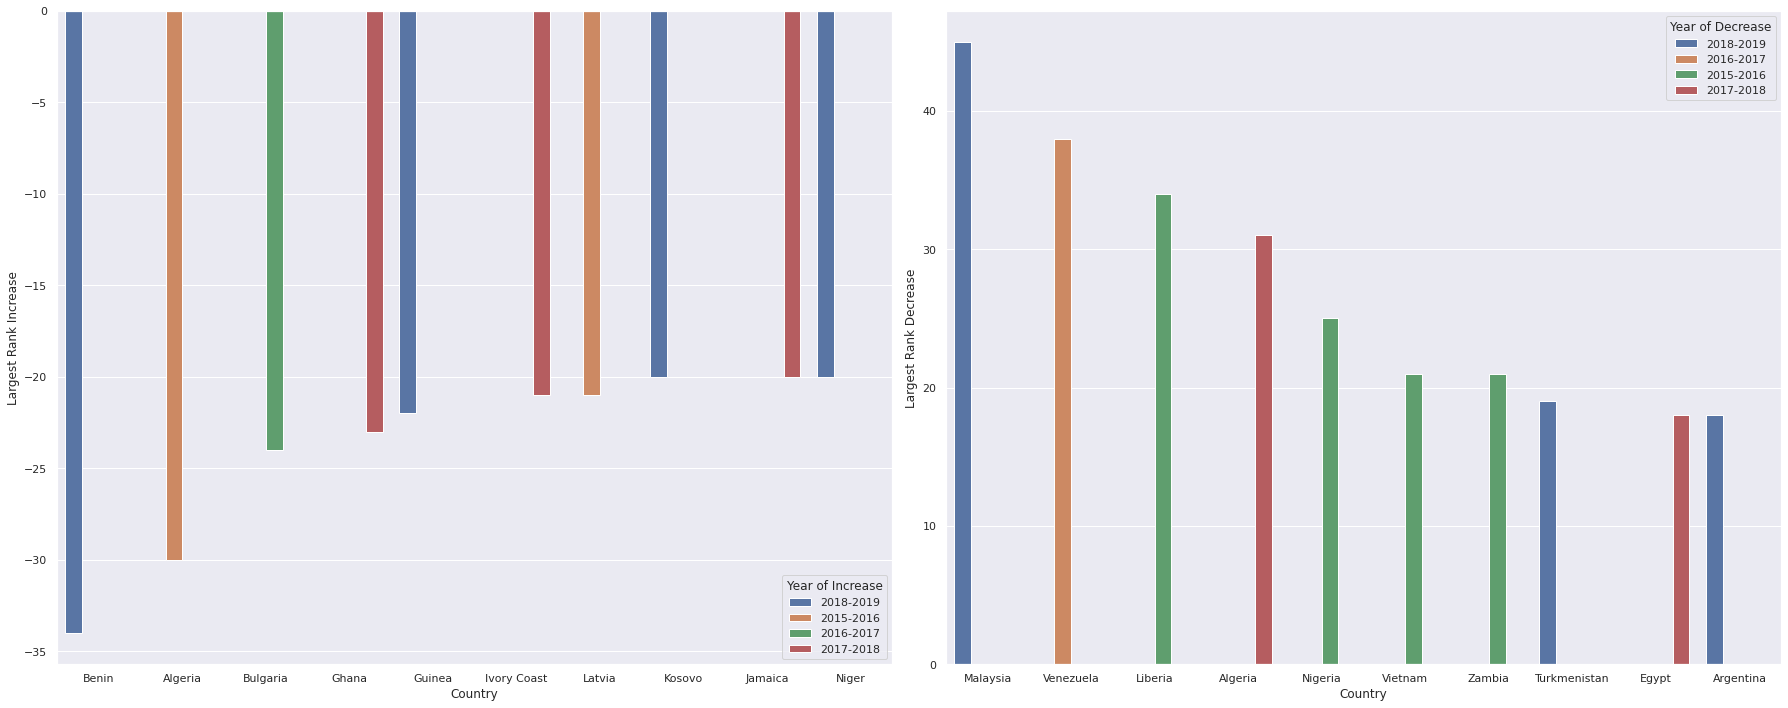

In [34]:
happiness_rank_change_df["Largest Rank Decrease"] = happiness_rank_change_df.max(axis=1)
happiness_rank_change_df["Year of Decrease"] = happiness_rank_change_df.idxmax(axis=1)
happiness_rank_decrease_df = happiness_rank_change_df.sort_values(by="Largest Rank Decrease", ascending=False).reset_index()
happiness_rank_decrease_df.drop(["2015-2016", "2016-2017", "2017-2018", "2018-2019"], axis=1 , inplace=True)

happiness_rank_change_df["Largest Rank Increase"] = happiness_rank_change_df.iloc[:,:-2].min(axis=1)
happiness_rank_change_df["Year of Increase"] = happiness_rank_change_df.iloc[:,:-2].idxmin(axis=1)
happiness_rank_increase_df = happiness_rank_change_df.sort_values(by="Largest Rank Increase").reset_index()
happiness_rank_increase_df.drop(["2015-2016", "2016-2017", "2017-2018", "2018-2019", "Largest Rank Decrease", "Year of Decrease"], axis=1 , inplace=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(
    data = happiness_rank_increase_df.head(10),
    x = "Country",
    y = "Largest Rank Increase",
    hue = "Year of Increase",
    ax = ax1
)
sns.barplot(
    data = happiness_rank_decrease_df.head(10),
    x = "Country",
    y = "Largest Rank Decrease",
    hue = "Year of Decrease",
    ax = ax2
)
plt.tight_layout()

From the plot above, we can see:
* The country with the largest Happiness Rank increase was Benin in 2018-2019.
* 2018-2019 was the period which had the highest number of large rank increases appearing in the top 10.
* The country with the largest Happiness Rank decrease was Malaysia in 2018-2019.
* 2015-2016 was the period which had the highest number of large rank decreases appearing in the top 10.

## What makes the happiest and the unhappiest countries of each year different to each other?

To answer this question, we wil compare the happiest and unhappiest countries of each year to each other, and look at which variables differ the most. We will create new dataframes for each year using the first and last rows of the happiness_20XX dataframes, then use the Pandas DataFrame .melt() method to unstack all of the variables around the "Country" column. We will visualise the data using side-by-side barplots.

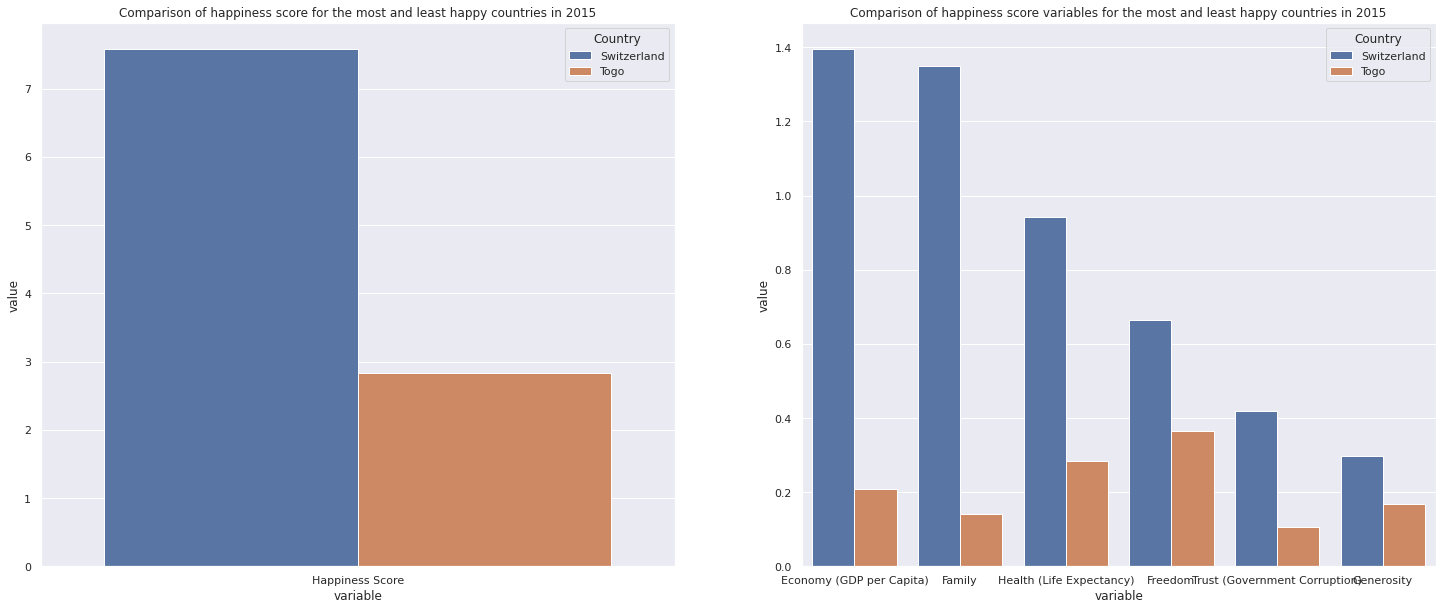

In [35]:
happiness_2015_firstlast_df = pd.concat([happiness_2015_df.head(1), happiness_2015_df.tail(1)]).reset_index(drop=True)
happiness_2015_firstlast_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)
happiness_2015_firstlast_df = happiness_2015_firstlast_df.melt(id_vars = "Country")

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(
    data = happiness_2015_firstlast_df.iloc[:2,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax1
).set_title("Comparison of happiness score for the most and least happy countries in 2015")
sns.barplot(
    data = happiness_2015_firstlast_df.iloc[2:,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax2
).set_title("Comparison of happiness score variables for the most and least happy countries in 2015")
plt.show()

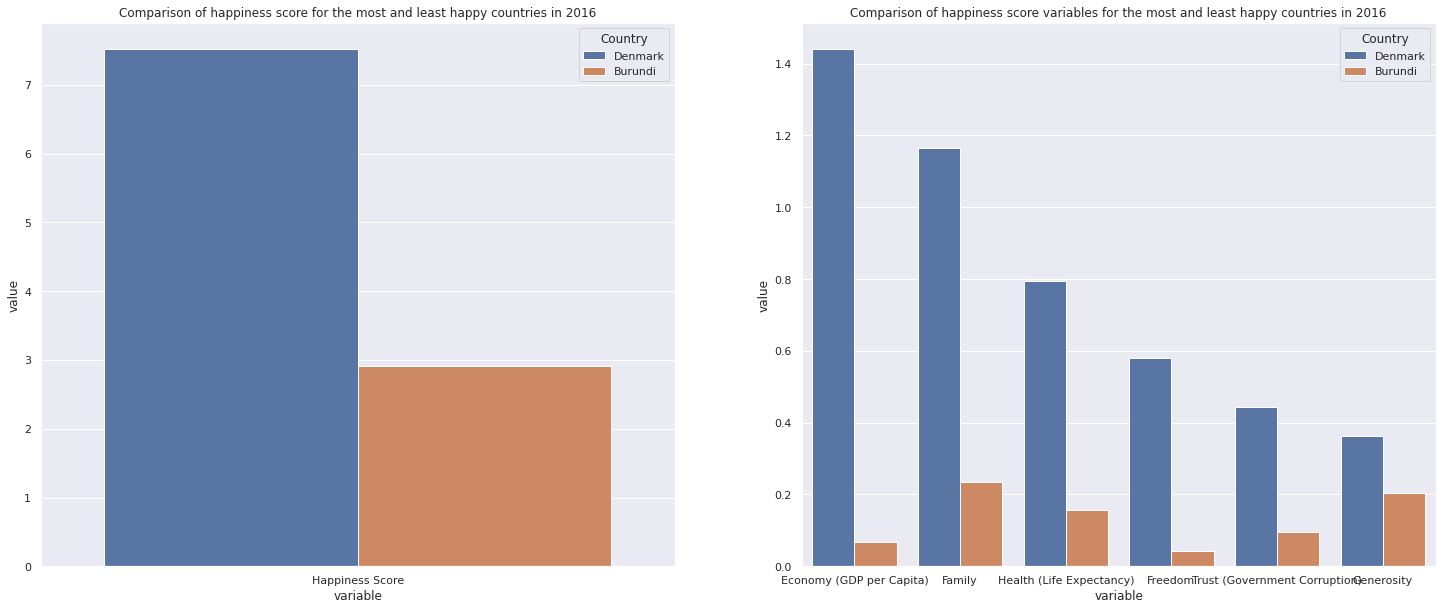

In [36]:
happiness_2016_firstlast_df = pd.concat([happiness_2016_df.head(1), happiness_2016_df.tail(1)]).reset_index(drop=True)
happiness_2016_firstlast_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)
happiness_2016_firstlast_df = happiness_2016_firstlast_df.melt(id_vars = "Country")

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(
    data = happiness_2016_firstlast_df.iloc[:2,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax1
).set_title("Comparison of happiness score for the most and least happy countries in 2016")
sns.barplot(
    data = happiness_2016_firstlast_df.iloc[2:,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax2
).set_title("Comparison of happiness score variables for the most and least happy countries in 2016")
plt.show()

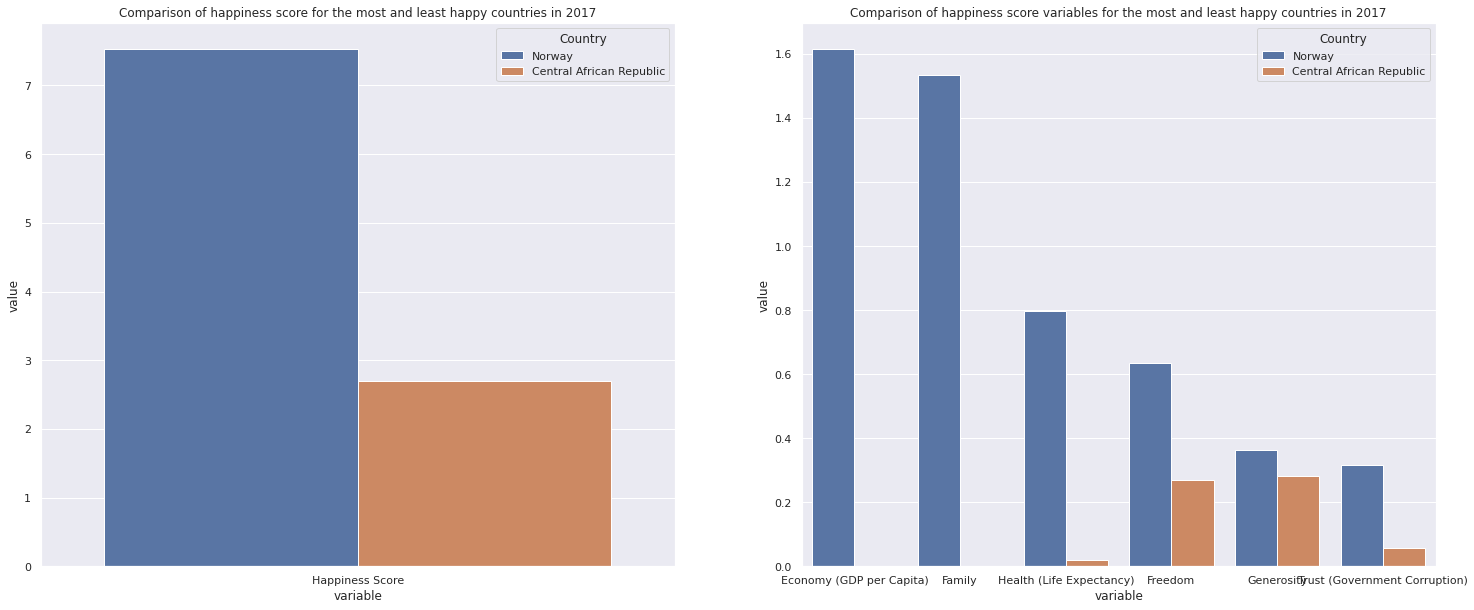

In [37]:
happiness_2017_firstlast_df = pd.concat([happiness_2017_df.head(1), happiness_2017_df.tail(1)]).reset_index(drop=True)
happiness_2017_firstlast_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)
happiness_2017_firstlast_df = happiness_2017_firstlast_df.melt(id_vars = "Country")

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(
    data = happiness_2017_firstlast_df.iloc[:2,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax1
).set_title("Comparison of happiness score for the most and least happy countries in 2017")
sns.barplot(
    data = happiness_2017_firstlast_df.iloc[2:,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax2
).set_title("Comparison of happiness score variables for the most and least happy countries in 2017")
plt.show()

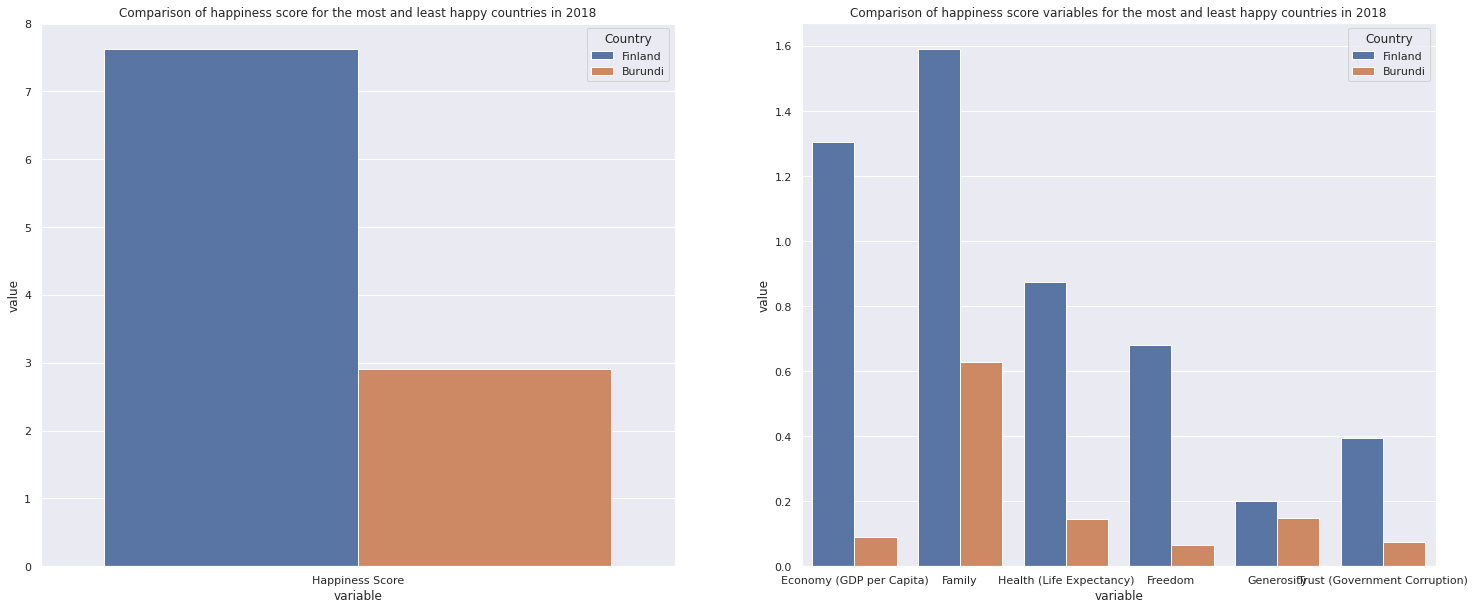

In [38]:
happiness_2018_firstlast_df = pd.concat([happiness_2018_df.head(1), happiness_2018_df.tail(1)]).reset_index(drop=True)
happiness_2018_firstlast_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)
happiness_2018_firstlast_df = happiness_2018_firstlast_df.melt(id_vars = "Country")

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(
    data = happiness_2018_firstlast_df.iloc[:2,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax1
).set_title("Comparison of happiness score for the most and least happy countries in 2018")
sns.barplot(
    data = happiness_2018_firstlast_df.iloc[2:,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax2
).set_title("Comparison of happiness score variables for the most and least happy countries in 2018")
plt.show()

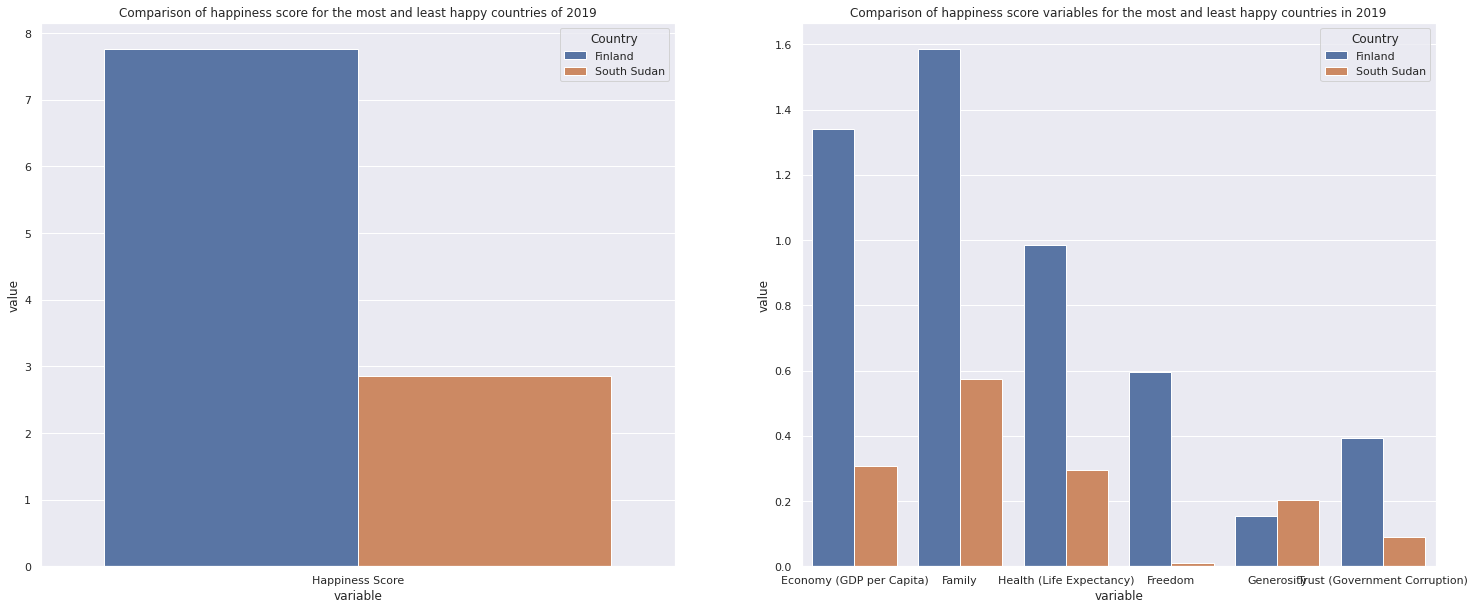

In [39]:
happiness_2019_firstlast_df = pd.concat([happiness_2019_df.head(1), happiness_2019_df.tail(1)]).reset_index(drop=True)
happiness_2019_firstlast_df.drop(["Happiness Rank", "Year"], axis=1, inplace=True)
happiness_2019_firstlast_df = happiness_2019_firstlast_df.melt(id_vars = "Country")

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(
    data = happiness_2019_firstlast_df.iloc[:2,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax1
).set_title("Comparison of happiness score for the most and least happy countries of 2019")
sns.barplot(
    data = happiness_2019_firstlast_df.iloc[2:,:],
    x = "variable",
    y = "value",
    hue = "Country",
    ax = ax2
).set_title("Comparison of happiness score variables for the most and least happy countries in 2019")
plt.show()

As expected, each of the variables that determines Happiness Score are greater in the highest ranking country than the lowest ranking country. Interestingly, the 3 variables that are the most strongly correlated with Happiness Score (ie. Economy, Health, and Family) are much greater in the highest ranking country than in the lowest ranking country. Similarly, the 2 variables that are the most weakly correlated with Happiness Score (ie. Trust and Generosity) are much closer to each other for both countries. In fact, in 2019, Generosity is higher in the lowest ranked country than the highest ranked country.

Once again, these plots confirm that countries with a stronger economy, higher life expectancy, and better social support have populations with greater happiness. 